In [2]:
import seaborn as sns
from datetime import datetime
#from skimage.io import imsave
import openpyxl
import numpy as np
import matplotlib.pyplot as plt
#%plt.style.use("v_paper")
import pandas as pd
from scipy.io import loadmat
%matplotlib inline
import seaborn as sns
import statsmodels.formula.api as smf
import re
from statsmodels.stats.anova import anova_lm
import os
import os.path
#import statsmodels.api as smapi
import sys
import warnings
from sklearn.linear_model import LinearRegression
if not sys.warnoptions:
    warnings.simplefilter("ignore")
import seaborn as sns
import statsmodels as sm
import scipy
from pathlib import Path
from itertools import chain
from scipy import optimize

In [3]:
Compdf=pd.read_pickle("Z:\GrunwaldKadow_group\Sophie\WalkProject\Compdf.pkl")
GoodICFiles=pd.read_pickle("Z:\GrunwaldKadow_group\Sophie\WalkProject\GoodICsdf.pkl")
Regionsdf=pd.read_pickle("Z:\GrunwaldKadow_group\Sophie\WalkProject\Regionsdf.pkl")

In [3]:
GoodICFiles.loc[GoodICFiles.index==0,'TSlowlimWalk']=0
GoodICFiles.loc[GoodICFiles.index==0,'TShighlimWalk']=4999
GoodICFiles.loc[GoodICFiles.index==24,'TSlowlimWalk']=2
GoodICFiles.loc[GoodICFiles.index==24,'TShighlimWalk']=4998
GoodICFiles.loc[GoodICFiles.index==126,'TSlowlimWalk']=1
GoodICFiles.loc[GoodICFiles.index==130,'TSlowlimWalk']=1
GoodICFiles.loc[GoodICFiles.index==130,'TShighlimWalk']=3000


In [4]:
T87_75=loadmat('C:\\Users\\aimon\Documents\GitHub\FlyLFM\MatlabFiles\CompareConditions\87to75.mat')['VarName3']

In [5]:
NameList=sorted(Regionsdf['RegionNames'].unique())

## Correlation binary regions

In [6]:
# Method 1

In [7]:
def piecewise_linear(x, x0, y0, k1, k2):
    return np.piecewise(x, [x < x0], [lambda x:k1*x + y0-k1*x0, lambda x:k2*x + y0-k2*x0])

In [8]:
# Model for fitting onset and offset
def model(x,a,b,c):
    if x<a:
        return b
    else:
        return b+(x-a)*c

def Sq(X):
    return sum([(model(i,X[0],X[1],X[2])-C[i])**2 for i in range(len(C))])  

In [9]:
# Figuring out the middle

216
(5523, 1) (75, 5000)
0.11025164547669886


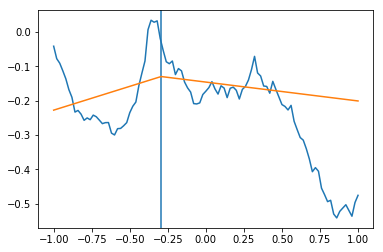

100761
(5523, 1) (87, 5523)
0.9976701851848977


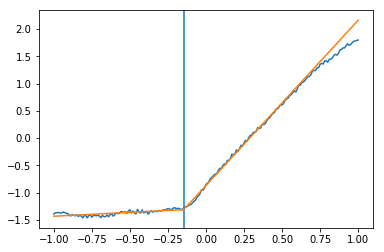

103
(5776, 1) (87, 5776)
0.9681289750605938


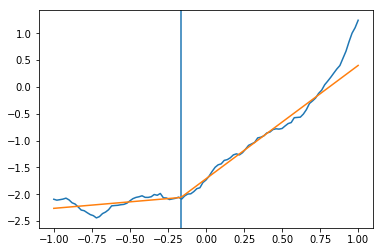

104
(5850, 1) (87, 5850)
0.5684291140522367


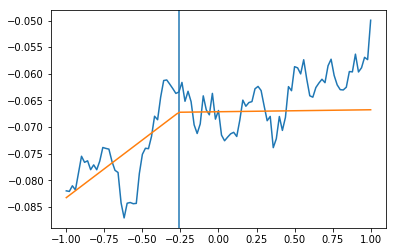

100106
(10607, 1) (75, 10607)
0.9966589216468613


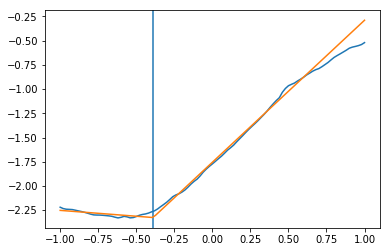

B34
(4995, 1) (87, 4995)
0.8867411237960645


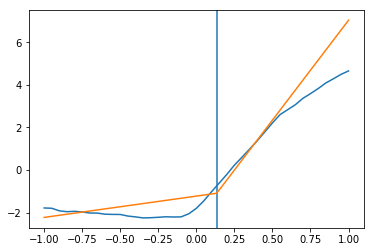

B35
(4997, 1) (87, 4997)
0.9360532894734871


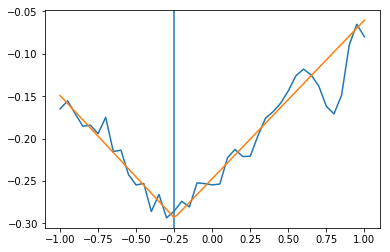

B36
(4997, 1) (87, 4997)
-inf


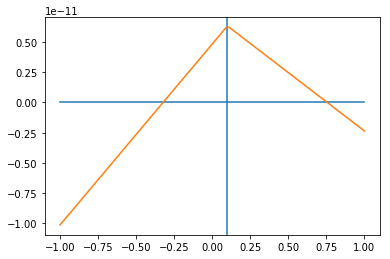

B37
(4995, 1) (87, 4995)
0.9582565368348687


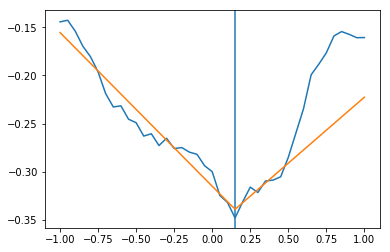

B41
(4995, 1) (87, 4995)
0.8400014600023917


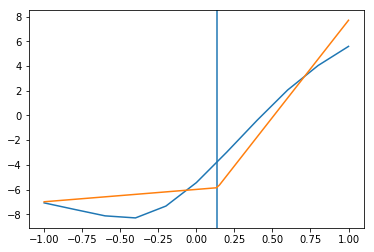

B42
(4998, 1) (87, 4998)
0.9784415037648346


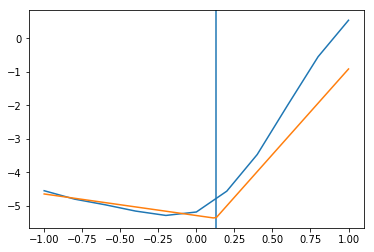

B43
(7997, 1) (87, 7997)
0.6009769153763767


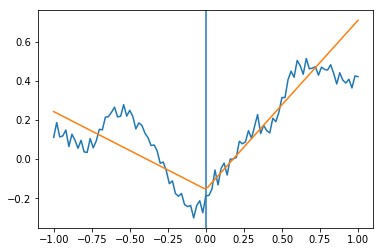

B180
(5094, 1) (87, 4994)
0.32734732912358344


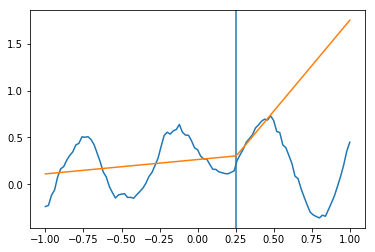

B182
(4995, 1) (87, 4995)
0.9912302106541301


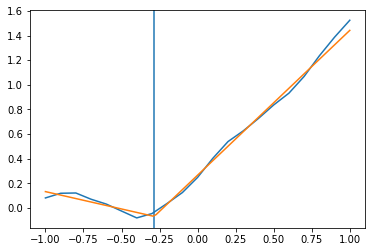

B183
(4995, 1) (87, 4995)
0.9500011309146579


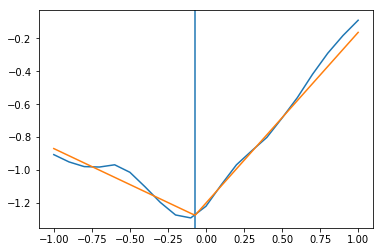

B192
(2000, 1) (87, 2000)
0.9003181848758698


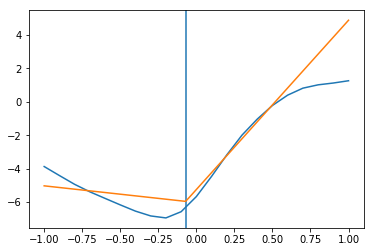

B193
(4996, 1) (87, 4996)
0.9750630811536475


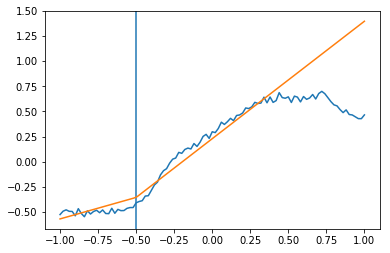

B194
(4996, 1) (87, 4996)
0.9960930332383567


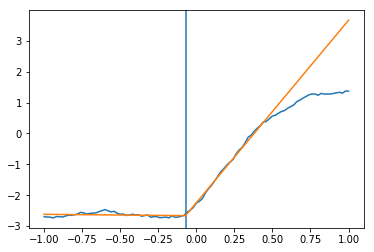

B195
(4996, 1) (87, 4996)
0.5913885923828592


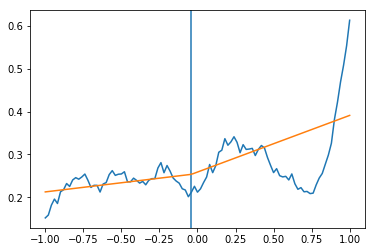

100234
(12257, 1) (75, 12257)
-inf


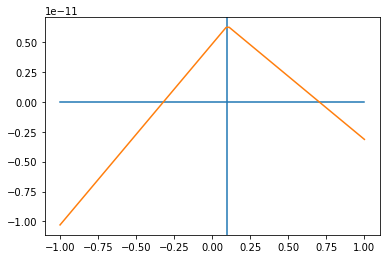

100609
(4579, 1) (75, 4579)
-inf


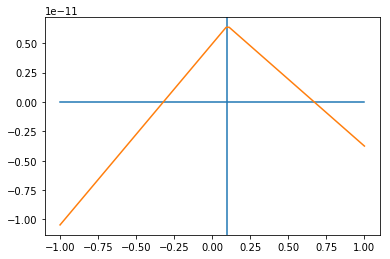

981
(23265, 1) (75, 23265)
0.9937641652983313


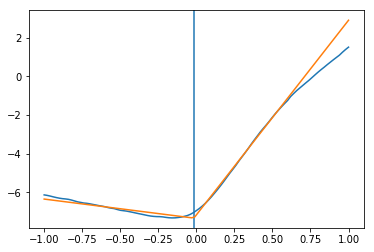

100133
(20650, 1) (75, 20650)
0.9910037680899441


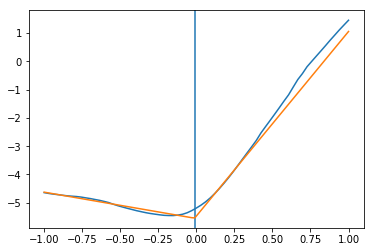

In [ ]:
Corronoff200=np.zeros((GoodICFiles.shape[0],41,200))
Corroff200=np.zeros((GoodICFiles.shape[0],41,200))
Corron200=np.zeros((GoodICFiles.shape[0],41,200))
Corron200Time=np.zeros((GoodICFiles.shape[0],41))
Regionsdf['OnTime']=np.nan

xnew = np.linspace(-1, 1, num=200, endpoint=True)
k=np.zeros(41)

for i in chain(range(134), range(135, 244), range(245, GoodICFiles.shape[0])):
#for i in range(7,10):
    #try:
        if GoodICFiles.iloc[i]['WalkRegressor'] != '':
            if (GoodICFiles.iloc[i]['RegionFile']!=''):
                TS=loadmat(GoodICFiles.iloc[i]['RegionFile'])['TS']
            #TS=loadmat(GoodICFiles.iloc[i]['TSfile'].replace('/','\\').replace('\\media\\NAS','Z:\\GrunwaldKadow_group').replace('.mat','GoodIC.mat'))['TSgoodIC']
            else:
                continue
            try:
                Regressor =loadmat(GoodICFiles.iloc[i]['WalkRegressor'].replace('kd',''))['R']
            except:
                try:
                    Regressor =loadmat(GoodICFiles.iloc[i]['WalkRegressor'].replace('kd',''))['Rwalk']
                except:
                    try:
                        Regressor =loadmat(GoodICFiles.iloc[i]['WalkRegressor'].replace('WalkRbinkd','Rbin'))['R']
                    except:
                        try:
                            Regressor =loadmat(GoodICFiles.iloc[i]['WalkRegressor'].replace('Rbinkd','Rbin'))['Rbin']
                        except:
                            Regressor =loadmat(GoodICFiles.iloc[i]['WalkRegressor'].replace('kd',''))['Rbin']
            
            if Regressor.shape[0]<Regressor.shape[1]:
                Regressor=Regressor.T
            if TS.shape[0]>TS.shape[1]:
                TS=TS.T    
                
            print(Regressor.shape, TS.shape)   
            
            if TS.shape[1]==(Regressor.shape[0]+2):
                TS=TS[:,1:Regressor.shape[0]+1]
            if TS.shape[1]==(Regressor.shape[0]+1):
                TS=TS[:,1:Regressor.shape[0]+1]            
            if TS.shape[1]==(Regressor.shape[0]+3):
                TS=TS[:,2:Regressor.shape[0]+2]   
                
            if TS.shape[1]==(Regressor.shape[0]-1):
                Regressor=Regressor[1:Regressor.shape[0]]    
            if TS.shape[1]==(Regressor.shape[0]-2):
                Regressor=Regressor[1:Regressor.shape[0]-1]    
            if TS.shape[1]==(Regressor.shape[0]-3):
                Regressor=Regressor[2:Regressor.shape[0]-1] 
            if TS.shape[1]==(Regressor.shape[0]-4):
                Regressor=Regressor[2:Regressor.shape[0]-2]                  
            if TS.shape[1]==(Regressor.shape[0]-6):
                Regressor=Regressor[3:Regressor.shape[0]-3]     
            if TS.shape[1]==(Regressor.shape[0]-5):
                Regressor=Regressor[3:Regressor.shape[0]-2]                     
            if TS.shape[1]==(Regressor.shape[0]+2):
                TS=TS[:,1:Regressor.shape[0]+1]
            if TS.shape[1]==(Regressor.shape[0]+1):
                TS=TS[:,0:Regressor.shape[0]]                 
              
            if TS.shape[1]!=(Regressor.shape[0]): 
                TS=TS[:,int(GoodICFiles.iloc[i]['TSlowlimWalk']):int(GoodICFiles.iloc[i]['TShighlimWalk']+1)]
            if Regressor.shape[0]<Regressor.shape[1]:
                Regressor=Regressor.T

            if TS.shape[1]==(Regressor.shape[0]+2):
                TS=TS[:,1:Regressor.shape[0]+1]
            if TS.shape[1]==(Regressor.shape[0]+1):
                TS=TS[:,1:Regressor.shape[0]+1]            
            if TS.shape[1]==(Regressor.shape[0]+3):
                TS=TS[:,2:Regressor.shape[0]+2]   
                
            if TS.shape[1]==(Regressor.shape[0]-1):
                Regressor=Regressor[1:Regressor.shape[0]]    
            if TS.shape[1]==(Regressor.shape[0]-2):
                Regressor=Regressor[1:Regressor.shape[0]-1]    
            if TS.shape[1]==(Regressor.shape[0]-3):
                Regressor=Regressor[2:Regressor.shape[0]-1] 
            if TS.shape[1]==(Regressor.shape[0]-4):
                Regressor=Regressor[2:Regressor.shape[0]-2]                  
            if TS.shape[1]==(Regressor.shape[0]-6):
                Regressor=Regressor[3:Regressor.shape[0]-3]     
            if TS.shape[1]==(Regressor.shape[0]-5):
                Regressor=Regressor[3:Regressor.shape[0]-2]                     
            if TS.shape[1]==(Regressor.shape[0]+2):
                TS=TS[:,1:Regressor.shape[0]+1]
            if TS.shape[1]==(Regressor.shape[0]+1):
                TS=TS[:,0:Regressor.shape[0]]   


            FR=GoodICFiles.iloc[i]['FR']
            #if len(TS)!=1 and pd.isnull(FR)==False:
            if len(TS)!=1 and FR>4:
                print(GoodICFiles.iloc[i]['expID'])
                           
                Ron=np.zeros(len(Regressor))
                Roff=np.zeros(len(Regressor))
                for m in range(int(1*FR),int(len(Regressor)-1*FR)):
                    if Regressor[m]==1 and all(Regressor[int(m-1*FR):int(m)]==0) and (np.mean(Regressor[int(m+1):int(m+1*FR)])>0.5):
                        Ron[m]=1                        
                    if Regressor[m]==1 and all(Regressor[int(m+1):int(m+1*FR)]==0) and (np.mean(Regressor[int(m-1*FR):int(m-1)])>0.5):
                        Roff[m+1]=1                    
                

                for j in range(75):    
                    if len(TS)==87:
                        TS2=TS
                        TS=np.zeros((75,TS.shape[1]))
                        for j in range(75):
                            TS[j,:]=TS2[T87_75[j][0]-1,:]  
                    
                    if np.isnan(np.mean(TS[j,:]))==False:
                        TS[j,:]=TS[j,:]/np.nanmax(TS[j,:])
                        Corr=np.correlate(TS[j,:],np.squeeze(Regressor.T), 'full')
                        Corrloc=Corr[int((len(Corr)-1)/2-FR):int((len(Corr)-1)/2+FR)+1]
                        x = np.linspace(-1, 1, num=len(Corrloc), endpoint=True)
                        Corrlocint=scipy.interpolate.interp1d(x,Corrloc, kind='cubic')
                        RegName=list(Regionsdf.loc[(Regionsdf.TSfile == GoodICFiles.iloc[i]['TSfile']) & (Regionsdf.RegionNum == j)]['RegionNames'])[0]
                        Corronoff200[i,NameList.index(RegName),:]=Corronoff200[i,NameList.index(RegName),:]+Corrlocint(xnew)


                        Corr=np.correlate(TS[j,:],np.squeeze(Ron.T), 'full')
                        #lags = scipy.signal.correlation_lags(len(TS[j,:])/FR)
                        Corrloc=Corr[int((len(Corr)-1)/2-FR):int((len(Corr)-1)/2+FR)+1]
                        Corrloc50=Corr[int(((len(Corr)-1)/2)-FR):int(((len(Corr)-1)/2)+0.5*FR)+1]
                        x = np.linspace(-1, 1, num=len(Corrloc), endpoint=True)
                        x50 = np.linspace(-1, 0.5, num=len(Corrloc50), endpoint=True)
                        Corrlocint=scipy.interpolate.interp1d(x,Corrloc, kind='cubic')
                        y0=np.mean(Corrloc)
                        yb=np.max(Corrloc)
                         
                        #C=Corrloc
                        #res = scipy.optimize.minimize(Sq,x0=[-0.5,y0,yb-y0])
                        #p=res.x[0]
                        
                        #p , e = optimize.curve_fit(lambda x, x0:piecewise_linear(x,x0,y0,0.001,yb-y0), xa, Corrloc,p0=0)

                        p , e = optimize.curve_fit(piecewise_linear, x50, Corrloc50,p0=[0.1,y0,0.001,yb-y0],bounds=([-0.5,y0-0.5*abs(y0)-1,-1,(yb-y0)-abs(yb-y0)-1],[0.5,(y0+0.5*abs(y0))+1,1,(yb-y0)+abs(yb-y0)+1]),method='trf')
                        RegName=list(Regionsdf.loc[(Regionsdf.TSfile == GoodICFiles.iloc[i]['TSfile']) & (Regionsdf.RegionNum == j)]['RegionNames'])[0]

                        residuals = Corrloc50- piecewise_linear(x50, *p)
                        ss_res = np.sum(residuals**2)
                        ss_tot = np.sum((Corrloc50-np.mean(Corrloc50))**2)
                        r_squared = 1 - (ss_res / ss_tot)
                        
                        Corron200[i,NameList.index(RegName),:]=Corron200[i,NameList.index(RegName),:]+Corrlocint(xnew)
                        Regionsdf.loc[(Regionsdf.TSfile == GoodICFiles.iloc[i]['TSfile']) & (Regionsdf.RegionNum == j),'OnTime']=p[0]
                        
                        if r_squared>0.9:
                            Corron200Time[i,NameList.index(RegName)]=Corron200Time[i,NameList.index(RegName)]+p[0]
                            k[NameList.index(RegName)]= k[NameList.index(RegName)]+1
                        
                        if j==6:
                            print(r_squared)
                            plt.plot(x,Corrloc)
                            plt.axvline(x=p[0])
                            xd = np.linspace(-1, 1, 100)
                            plt.plot(xd, piecewise_linear(xd, *p))
                            #plt.plot(x,[model(int(i),res.x[0],res.x[1],res.x[2])for i in x])
                            plt.show()   

                        Corr=np.correlate(TS[j,:],np.squeeze(Roff.T), 'full')
                        Corrloc=Corr[int((len(Corr)-1)/2-FR):int((len(Corr)-1)/2+FR)+1]
                        x = np.linspace(-1, 1, num=len(Corrloc), endpoint=True)
                        Corrlocint=scipy.interpolate.interp1d(x,Corrloc, kind='cubic')
                        RegName=list(Regionsdf.loc[(Regionsdf.TSfile == GoodICFiles.iloc[i]['TSfile']) & (Regionsdf.RegionNum == j)]['RegionNames'])[0]
                        Corroff200[i,NameList.index(RegName),:]=Corroff200[i,NameList.index(RegName),:]+Corrlocint(xnew)

                del TS
                
   # except:
      #   continue   


In [ ]:
Corronoff200=np.zeros((GoodICFiles.shape[0],41,200))
Corroff200=np.zeros((GoodICFiles.shape[0],41,200))
Corron200b=np.zeros((GoodICFiles.shape[0],41,200))
Corron200Time=np.zeros((GoodICFiles.shape[0],41))
Regionsdf['OnTimeb']=np.nan

xnew = np.linspace(-1, 1, num=200, endpoint=True)
k=np.zeros(41)

for i in chain(range(134), range(135, 244), range(245, GoodICFiles.shape[0])):
#for i in range(7,10):
    #try:
        if GoodICFiles.iloc[i]['WalkRegressor'] != '':
            if (GoodICFiles.iloc[i]['RegionFile']!=''):
                TS=loadmat(GoodICFiles.iloc[i]['RegionFile'])['TS']
            #TS=loadmat(GoodICFiles.iloc[i]['TSfile'].replace('/','\\').replace('\\media\\NAS','Z:\\GrunwaldKadow_group').replace('.mat','GoodIC.mat'))['TSgoodIC']
            else:
                continue
            try:
                Regressor =loadmat(GoodICFiles.iloc[i]['WalkRegressor'].replace('kd',''))['R']
            except:
                try:
                    Regressor =loadmat(GoodICFiles.iloc[i]['WalkRegressor'].replace('kd',''))['Rwalk']
                except:
                    try:
                        Regressor =loadmat(GoodICFiles.iloc[i]['WalkRegressor'].replace('WalkRbinkd','Rbin'))['R']
                    except:
                        try:
                            Regressor =loadmat(GoodICFiles.iloc[i]['WalkRegressor'].replace('Rbinkd','Rbin'))['Rbin']
                        except:
                            Regressor =loadmat(GoodICFiles.iloc[i]['WalkRegressor'].replace('kd',''))['Rbin']
            
            if Regressor.shape[0]<Regressor.shape[1]:
                Regressor=Regressor.T
            if TS.shape[0]>TS.shape[1]:
                TS=TS.T    
                
            print(Regressor.shape, TS.shape)   
            
            if TS.shape[1]==(Regressor.shape[0]+2):
                TS=TS[:,1:Regressor.shape[0]+1]
            if TS.shape[1]==(Regressor.shape[0]+1):
                TS=TS[:,0:Regressor.shape[0]]            
            if TS.shape[1]==(Regressor.shape[0]+3):
                TS=TS[:,1:Regressor.shape[0]+1]   
                
            if TS.shape[1]==(Regressor.shape[0]-1):
                Regressor=Regressor[0:Regressor.shape[0]-1]    
            if TS.shape[1]==(Regressor.shape[0]-2):
                Regressor=Regressor[1:Regressor.shape[0]-1]    
            if TS.shape[1]==(Regressor.shape[0]-3):
                Regressor=Regressor[1:Regressor.shape[0]-2] 
            if TS.shape[1]==(Regressor.shape[0]-4):
                Regressor=Regressor[2:Regressor.shape[0]-2]                  
            if TS.shape[1]==(Regressor.shape[0]-6):
                Regressor=Regressor[3:Regressor.shape[0]-3]     
            if TS.shape[1]==(Regressor.shape[0]-5):
                Regressor=Regressor[2:Regressor.shape[0]-3]                     
            if TS.shape[1]==(Regressor.shape[0]+2):
                TS=TS[:,1:Regressor.shape[0]+1]                 
              
            if TS.shape[1]!=(Regressor.shape[0]): 
                TS=TS[:,int(GoodICFiles.iloc[i]['TSlowlimWalk']):int(GoodICFiles.iloc[i]['TShighlimWalk']+1)]
                
            if TS.shape[1]==(Regressor.shape[0]+2):
                TS=TS[:,1:Regressor.shape[0]+1]
            if TS.shape[1]==(Regressor.shape[0]+1):
                TS=TS[:,0:Regressor.shape[0]]            
            if TS.shape[1]==(Regressor.shape[0]+3):
                TS=TS[:,1:Regressor.shape[0]+1]   
                
            if TS.shape[1]==(Regressor.shape[0]-1):
                Regressor=Regressor[0:Regressor.shape[0]-1]    
            if TS.shape[1]==(Regressor.shape[0]-2):
                Regressor=Regressor[1:Regressor.shape[0]-1]    
            if TS.shape[1]==(Regressor.shape[0]-3):
                Regressor=Regressor[1:Regressor.shape[0]-2] 
            if TS.shape[1]==(Regressor.shape[0]-4):
                Regressor=Regressor[2:Regressor.shape[0]-2]                  
            if TS.shape[1]==(Regressor.shape[0]-6):
                Regressor=Regressor[3:Regressor.shape[0]-3]     
            if TS.shape[1]==(Regressor.shape[0]-5):
                Regressor=Regressor[2:Regressor.shape[0]-3]                     
            if TS.shape[1]==(Regressor.shape[0]+2):
                TS=TS[:,1:Regressor.shape[0]+1]     


            FR=GoodICFiles.iloc[i]['FR']
            #if len(TS)!=1 and pd.isnull(FR)==False:
            if len(TS)!=1 and FR>4:
                print(GoodICFiles.iloc[i]['expID'])
                           
                Ron=np.zeros(len(Regressor))
                Roff=np.zeros(len(Regressor))
                for m in range(int(1*FR),int(len(Regressor)-1*FR)):
                    if Regressor[m]==1 and all(Regressor[int(m-1*FR):int(m)]==0) and (np.mean(Regressor[int(m+1):int(m+1*FR)])>0.5):
                        Ron[m]=1                        
                    if Regressor[m]==1 and all(Regressor[int(m+1):int(m+1*FR)]==0) and (np.mean(Regressor[int(m-1*FR):int(m-1)])>0.5):
                        Roff[m+1]=1                    
                

                for j in range(75):    
                    if len(TS)==87:
                        TS2=TS
                        TS=np.zeros((75,TS.shape[1]))
                        for j in range(75):
                            TS[j,:]=TS2[T87_75[j][0]-1,:]  
                    
                    if np.isnan(np.mean(TS[j,:]))==False:
                        TS[j,:]=TS[j,:]/np.nanmax(TS[j,:])
                        Corr=np.correlate(TS[j,:],np.squeeze(Regressor.T), 'full')
                        Corrloc=Corr[int((len(Corr)-1)/2-FR):int((len(Corr)-1)/2+FR)+1]
                        x = np.linspace(-1, 1, num=len(Corrloc), endpoint=True)
                        Corrlocint=scipy.interpolate.interp1d(x,Corrloc, kind='cubic')
                        RegName=list(Regionsdf.loc[(Regionsdf.TSfile == GoodICFiles.iloc[i]['TSfile']) & (Regionsdf.RegionNum == j)]['RegionNames'])[0]
                        Corronoff200[i,NameList.index(RegName),:]=Corronoff200[i,NameList.index(RegName),:]+Corrlocint(xnew)


                        Corr=np.correlate(TS[j,:],np.squeeze(Ron.T), 'full')
                        #lags = scipy.signal.correlation_lags(len(TS[j,:])/FR)
                        Corrloc=Corr[int((len(Corr)-1)/2-FR):int((len(Corr)-1)/2+FR)+1]
                        Corrloc50=Corr[int(((len(Corr)-1)/2)-FR):int(((len(Corr)-1)/2)+0.5*FR)+1]
                        x = np.linspace(-1, 1, num=len(Corrloc), endpoint=True)
                        x50 = np.linspace(-1, 0.5, num=len(Corrloc50), endpoint=True)
                        Corrlocint=scipy.interpolate.interp1d(x,Corrloc, kind='cubic')
                        y0=np.mean(Corrloc)
                        yb=np.max(Corrloc)
                         
                        #C=Corrloc
                        #res = scipy.optimize.minimize(Sq,x0=[-0.5,y0,yb-y0])
                        #p=res.x[0]
                        
                        #p , e = optimize.curve_fit(lambda x, x0:piecewise_linear(x,x0,y0,0.001,yb-y0), xa, Corrloc,p0=0)

                        p , e = optimize.curve_fit(piecewise_linear, x50, Corrloc50,p0=[0.1,y0,0.001,yb-y0],bounds=([-0.5,y0-0.5*abs(y0)-1,-1,(yb-y0)-abs(yb-y0)-1],[0.5,(y0+0.5*abs(y0))+1,1,(yb-y0)+abs(yb-y0)+1]),method='trf')
                        RegName=list(Regionsdf.loc[(Regionsdf.TSfile == GoodICFiles.iloc[i]['TSfile']) & (Regionsdf.RegionNum == j)]['RegionNames'])[0]

                        residuals = Corrloc50- piecewise_linear(x50, *p)
                        ss_res = np.sum(residuals**2)
                        ss_tot = np.sum((Corrloc50-np.mean(Corrloc50))**2)
                        r_squared = 1 - (ss_res / ss_tot)
                        
                        Corron200b[i,NameList.index(RegName),:]=Corron200[i,NameList.index(RegName),:]+Corrlocint(xnew)
                        Regionsdf.loc[(Regionsdf.TSfile == GoodICFiles.iloc[i]['TSfile']) & (Regionsdf.RegionNum == j),'OnTimeb']=p[0]
                        
                        if r_squared>0.9:
                            Corron200Time[i,NameList.index(RegName)]=Corron200Time[i,NameList.index(RegName)]+p[0]
                            k[NameList.index(RegName)]= k[NameList.index(RegName)]+1
                        
                        if j==6:
                            print(r_squared)
                            plt.plot(x,Corrloc)
                            plt.axvline(x=p[0])
                            xd = np.linspace(-1, 1, 100)
                            plt.plot(xd, piecewise_linear(xd, *p))
                            #plt.plot(x,[model(int(i),res.x[0],res.x[1],res.x[2])for i in x])
                            plt.show()   

                        Corr=np.correlate(TS[j,:],np.squeeze(Roff.T), 'full')
                        Corrloc=Corr[int((len(Corr)-1)/2-FR):int((len(Corr)-1)/2+FR)+1]
                        x = np.linspace(-1, 1, num=len(Corrloc), endpoint=True)
                        Corrlocint=scipy.interpolate.interp1d(x,Corrloc, kind='cubic')
                        RegName=list(Regionsdf.loc[(Regionsdf.TSfile == GoodICFiles.iloc[i]['TSfile']) & (Regionsdf.RegionNum == j)]['RegionNames'])[0]
                        Corroff200[i,NameList.index(RegName),:]=Corroff200[i,NameList.index(RegName),:]+Corrlocint(xnew)

                del TS
                
   # except:
      #   continue   


In [ ]:
Corron200Time[i,NameList.index(RegName)]=Corron200Time[i,NameList.index(RegName)]/(k[NameList.index(RegName)]+1)

In [ ]:
np.save('Corron200Time.npy',Corron200Time)
np.save('Corron200.npy',Corron200)

In [4]:
Corron200Time=np.load('Corron200Time.npy')
Corron200=np.load('Corron200.npy')

In [5]:
Corron200Time[Corron200Time==0]=np.nan

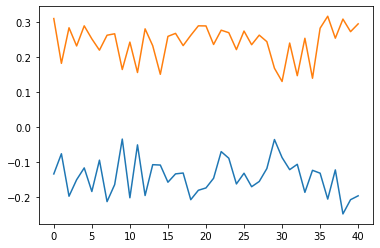

In [6]:
plt.plot(np.nanmean(Corron200Time,axis=0))
plt.plot(np.nanstd(Corron200Time,axis=0))
#plt.xlabel(NamesList)

([array([0., 0., 0., 1., 2., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0.,
         0., 2., 0., 0., 0., 1., 1., 3., 4., 2., 4., 4., 2., 0., 1., 1., 1.,
         1., 1., 4., 3., 2., 2., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
         0., 1., 0., 1., 1., 1., 2., 1., 1., 0., 4., 4., 4., 1., 3., 3., 3.,
         1., 3., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 2., 0., 1., 0., 2., 0., 0., 0., 2., 0.,
         1., 1., 0., 2., 1., 4., 1., 3., 2., 3., 3., 3., 2., 1., 3., 2., 1.,
         1., 2., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
         1., 2., 0., 0., 1., 2., 0., 3., 7., 4., 5., 2., 2., 1., 3., 0., 1.,
         0., 0., 2., 2., 0., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
       

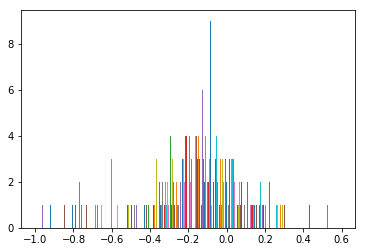

In [9]:
plt.hist(Corron200Time,50)
#plt.xlim(-0.1,0.1)

In [ ]:
fig, axs = plt.subplots(6, 8,figsize=(20,18))
CorronPAN=np.zeros((41,200,GoodICFiles.shape[0]))
CorronPAN[:,:,:]=np.nan
k=np.zeros((41))
for i in range(GoodICFiles.shape[0]):
        if (GoodICFiles.iloc[i]['GAL4'] == 'Nsyb' or GoodICFiles.iloc[i]['GAL4'] == 'GMR57C10') :
            for j in range(41):
                if any(Corron200[i,j,:]!=np.nan) and (np.nanmax(Corron200[i,j,:])-np.nanmin(Corron200[i,j,:]))!=0:
                    CorronPAN[j,:,int(k[j])]=(Corron200[i,j,:]-np.nanmin(Corron200[i,j,:]))/(np.nanmax(Corron200[i,j,:])-np.nanmin(Corron200[i,j,:]))
                    axs[int(np.floor(j/8)),j-int(np.floor(j/8)*8)].plot((Corron200[i,j,:]-np.nanmin(Corron200[i,j,:]))/(np.nanmax(Corron200[i,j,:])-np.nanmin(Corron200[i,j,:])))
                    axs[int(np.floor(j/8)),j-int(np.floor(j/8)*8)].set_title(NameList[j]) 
                    axs[int(np.floor(j/8)),j-int(np.floor(j/8)*8)].axvline(x=100)
                    k[j]=k[j]+1
plt.show()  

In [ ]:
fig, axs = plt.subplots(6, 8,figsize=(20,18))
for j in range(41):
    axs[int(np.floor(j/8)),j-int(np.floor(j/8)*8)].plot(np.nanmean(CorronPAN[j,:,:],axis=1))
    err=np.nanstd(CorronPAN[j,:,:],axis=1)
    axs[int(np.floor(j/8)),j-int(np.floor(j/8)*8)].set_title(NameList[j],size=20) 
    axs[int(np.floor(j/8)),j-int(np.floor(j/8)*8)].axvline(x=100)
    axs[int(np.floor(j/8)),j-int(np.floor(j/8)*8)].fill_between(range(200),np.nanmean(CorronPAN[j,:,:],axis=1)-err, np.nanmean(CorronPAN[j,:,:],axis=1)+err,color='grey',
                 alpha=0.5)  
    axs[int(np.floor(j/8)),j-int(np.floor(j/8)*8)].get_xaxis().set_visible(False)
    axs[int(np.floor(j/8)),j-int(np.floor(j/8)*8)].get_yaxis().set_visible(False)
plt.tight_layout()
plt.show()  
plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure6\CorronPAN.svg')

In [ ]:
fig, axs = plt.subplots(6, 8,figsize=(20,18))
CorronGad=np.zeros((41,200,GoodICFiles.shape[0]))
CorronGad[:,:,:]=np.nan
k=np.zeros((41))
for i in range(GoodICFiles.shape[0]):
        if (GoodICFiles.iloc[i]['GAL4'] == 'Gad') :
            for j in range(41):
                if any(Corron200[i,j,:]!=np.nan) and (np.nanmax(Corron200[i,j,:])-np.nanmin(Corron200[i,j,:]))!=0:
                    CorronGad[j,:,int(k[j])]=(Corron200[i,j,:]-np.nanmin(Corron200[i,j,:]))/(np.nanmax(Corron200[i,j,:])-np.nanmin(Corron200[i,j,:]))
                    axs[int(np.floor(j/8)),j-int(np.floor(j/8)*8)].plot((Corron200[i,j,:]-np.nanmin(Corron200[i,j,:]))/(np.nanmax(Corron200[i,j,:])-np.nanmin(Corron200[i,j,:])))
                    axs[int(np.floor(j/8)),j-int(np.floor(j/8)*8)].set_title(NameList[j]) 
                    axs[int(np.floor(j/8)),j-int(np.floor(j/8)*8)].axvline(x=100)
                    k[j]=k[j]+1
plt.show()  

In [ ]:
fig, axs = plt.subplots(6, 8,figsize=(20,18))
CorronTH=np.zeros((41,200,GoodICFiles.shape[0]))
CorronTH[:,:,:]=np.nan
k=np.zeros((41))
for i in range(GoodICFiles.shape[0]):
        if (GoodICFiles.iloc[i]['GAL4'] == 'TH') :
            for j in range(41):
                if any(Corron200[i,j,:]!=np.nan) and (np.nanmax(Corron200[i,j,:])-np.nanmin(Corron200[i,j,:]))!=0:
                    CorronTH[j,:,int(k[j])]=(Corron200[i,j,:]-np.nanmin(Corron200[i,j,:]))/(np.nanmax(Corron200[i,j,:])-np.nanmin(Corron200[i,j,:]))
                    axs[int(np.floor(j/8)),j-int(np.floor(j/8)*8)].plot((Corron200[i,j,:]-np.nanmin(Corron200[i,j,:]))/(np.nanmax(Corron200[i,j,:])-np.nanmin(Corron200[i,j,:])))
                    axs[int(np.floor(j/8)),j-int(np.floor(j/8)*8)].set_title(NameList[j]) 
                    axs[int(np.floor(j/8)),j-int(np.floor(j/8)*8)].axvline(x=100)
                    k[j]=k[j]+1
plt.show()  

In [ ]:
fig, axs = plt.subplots(6, 8,figsize=(20,18))
CorronTrh=np.zeros((41,200,GoodICFiles.shape[0]))
CorronTrh[:,:,:]=np.nan
k=np.zeros((41))
for i in range(GoodICFiles.shape[0]):
        if (GoodICFiles.iloc[i]['GAL4'] == 'Trh') :
            for j in range(41):
                if any(Corron200[i,j,:]!=np.nan) and (np.nanmax(Corron200[i,j,:])-np.nanmin(Corron200[i,j,:]))!=0:
                    CorronTrh[j,:,int(k[j])]=(Corron200[i,j,:]-np.nanmin(Corron200[i,j,:]))/(np.nanmax(Corron200[i,j,:])-np.nanmin(Corron200[i,j,:]))
                    axs[int(np.floor(j/8)),j-int(np.floor(j/8)*8)].plot((Corron200[i,j,:]-np.nanmin(Corron200[i,j,:]))/(np.nanmax(Corron200[i,j,:])-np.nanmin(Corron200[i,j,:])))
                    axs[int(np.floor(j/8)),j-int(np.floor(j/8)*8)].set_title(NameList[j]) 
                    axs[int(np.floor(j/8)),j-int(np.floor(j/8)*8)].axvline(x=100)
                    k[j]=k[j]+1
plt.show()  

In [ ]:
fig, axs = plt.subplots(6, 8,figsize=(20,18))
CorronTDC=np.zeros((41,200,GoodICFiles.shape[0]))
CorronTDC[:,:,:]=np.nan
k=np.zeros((41))
for i in range(GoodICFiles.shape[0]):
        if (GoodICFiles.iloc[i]['GAL4'] == 'TDC') :
            for j in range(41):
                if any(Corron200[i,j,:]!=np.nan) and (np.nanmax(Corron200[i,j,:])-np.nanmin(Corron200[i,j,:]))!=0:
                    CorronTDC[j,:,int(k[j])]=(Corron200[i,j,:]-np.nanmin(Corron200[i,j,:]))/(np.nanmax(Corron200[i,j,:])-np.nanmin(Corron200[i,j,:]))
                    axs[int(np.floor(j/8)),j-int(np.floor(j/8)*8)].plot((Corron200[i,j,:]-np.nanmin(Corron200[i,j,:]))/(np.nanmax(Corron200[i,j,:])-np.nanmin(Corron200[i,j,:])))
                    axs[int(np.floor(j/8)),j-int(np.floor(j/8)*8)].set_title(NameList[j]) 
                    axs[int(np.floor(j/8)),j-int(np.floor(j/8)*8)].axvline(x=100)
                    k[j]=k[j]+1
plt.show()  

In [ ]:
fig, axs = plt.subplots(6, 8,figsize=(20,18))
for j in range(41):
    axs[int(np.floor(j/8)),j-int(np.floor(j/8)*8)].plot(np.nanmean(CorronTH[j,:,:],axis=1))
    err=np.nanstd(CorronTH[j,:,:],axis=1)
    axs[int(np.floor(j/8)),j-int(np.floor(j/8)*8)].set_title(NameList[j],size=20) 
    axs[int(np.floor(j/8)),j-int(np.floor(j/8)*8)].axvline(x=100, color='black')
    axs[int(np.floor(j/8)),j-int(np.floor(j/8)*8)].fill_between(range(200),np.nanmean(CorronTH[j,:,:],axis=1)-err, np.nanmean(CorronTH[j,:,:],axis=1)+err,color='grey',
                 alpha=0.5)  
    axs[int(np.floor(j/8)),j-int(np.floor(j/8)*8)].get_xaxis().set_visible(False)
    axs[int(np.floor(j/8)),j-int(np.floor(j/8)*8)].get_yaxis().set_visible(False)
plt.tight_layout()
plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure6\CorronTH.svg')
plt.show()  

In [ ]:
fig, axs = plt.subplots(6, 8,figsize=(20,18))
for j in range(41):
    axs[int(np.floor(j/8)),j-int(np.floor(j/8)*8)].plot(np.nanmean(CorronTDC[j,:,:],axis=1))
    err=np.nanstd(CorronTDC[j,:,:],axis=1)
    axs[int(np.floor(j/8)),j-int(np.floor(j/8)*8)].set_title(NameList[j],size=20) 
    axs[int(np.floor(j/8)),j-int(np.floor(j/8)*8)].axvline(x=100, color='black')
    axs[int(np.floor(j/8)),j-int(np.floor(j/8)*8)].fill_between(range(200),np.nanmean(CorronTDC[j,:,:],axis=1)-err, np.nanmean(CorronTDC[j,:,:],axis=1)+err,color='grey',
                 alpha=0.5)  
    axs[int(np.floor(j/8)),j-int(np.floor(j/8)*8)].get_xaxis().set_visible(False)
    axs[int(np.floor(j/8)),j-int(np.floor(j/8)*8)].get_yaxis().set_visible(False)
plt.tight_layout()
plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure6\CorronTDC.svg')
plt.show()  

In [ ]:
fig, axs = plt.subplots(6, 8,figsize=(20,18))
for j in range(41):
    axs[int(np.floor(j/8)),j-int(np.floor(j/8)*8)].plot(np.nanmean(CorronTrh[j,:,:],axis=1))
    err=np.nanstd(CorronTrh[j,:,:],axis=1)
    axs[int(np.floor(j/8)),j-int(np.floor(j/8)*8)].set_title(NameList[j],size=20) 
    axs[int(np.floor(j/8)),j-int(np.floor(j/8)*8)].axvline(x=100)
    axs[int(np.floor(j/8)),j-int(np.floor(j/8)*8)].fill_between(range(200),np.nanmean(CorronTrh[j,:,:],axis=1)-err, np.nanmean(CorronTrh[j,:,:],axis=1)+err,color='grey',
                 alpha=0.5)  
    axs[int(np.floor(j/8)),j-int(np.floor(j/8)*8)].get_xaxis().set_visible(False)
    axs[int(np.floor(j/8)),j-int(np.floor(j/8)*8)].get_yaxis().set_visible(False)
plt.tight_layout()
plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure6\CorronTrh.svg')
plt.show()  

In [ ]:
fig, axs = plt.subplots(6, 8,figsize=(20,18))
for j in range(41):
    axs[int(np.floor(j/8)),j-int(np.floor(j/8)*8)].plot(np.nanmean(CorronGad[j,:,:],axis=1))
    err=np.nanstd(CorronGad[j,:,:],axis=1)
    axs[int(np.floor(j/8)),j-int(np.floor(j/8)*8)].set_title(NameList[j],size=20) 
    axs[int(np.floor(j/8)),j-int(np.floor(j/8)*8)].axvline(x=100)
    axs[int(np.floor(j/8)),j-int(np.floor(j/8)*8)].fill_between(range(200),np.nanmean(CorronGad[j,:,:],axis=1)-err, np.nanmean(CorronGad[j,:,:],axis=1)+err,color='grey',
                 alpha=0.5)  
    axs[int(np.floor(j/8)),j-int(np.floor(j/8)*8)].get_xaxis().set_visible(False)
    axs[int(np.floor(j/8)),j-int(np.floor(j/8)*8)].get_yaxis().set_visible(False)
plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure6\CorronGad.svg')
plt.tight_layout()
plt.show()  

In [ ]:
fig, axs = plt.subplots(6, 8,figsize=(20,18))
CorronCha=np.zeros((41,200,GoodICFiles.shape[0]))
CorronCha[:,:,:]=np.nan
k=np.zeros((41))
for i in range(GoodICFiles.shape[0]):
        if (GoodICFiles.iloc[i]['GAL4'] == 'Cha') :
            for j in range(41):
                if any(Corron200[i,j,:]!=np.nan) and (np.nanmax(Corron200[i,j,:])-np.nanmin(Corron200[i,j,:]))!=0:
                    CorronCha[j,:,int(k[j])]=(Corron200[i,j,:]-np.nanmin(Corron200[i,j,:]))/(np.nanmax(Corron200[i,j,:])-np.nanmin(Corron200[i,j,:]))
                    axs[int(np.floor(j/8)),j-int(np.floor(j/8)*8)].plot((Corron200[i,j,:]-np.nanmin(Corron200[i,j,:]))/(np.nanmax(Corron200[i,j,:])-np.nanmin(Corron200[i,j,:])))
                    axs[int(np.floor(j/8)),j-int(np.floor(j/8)*8)].set_title(NameList[j]) 
                    axs[int(np.floor(j/8)),j-int(np.floor(j/8)*8)].axvline(x=100)
                    k[j]=k[j]+1
plt.show()  

In [ ]:
fig, axs = plt.subplots(6, 8,figsize=(20,18))
for j in range(41):
    axs[int(np.floor(j/8)),j-int(np.floor(j/8)*8)].plot(np.nanmean(CorronCha[j,:,:],axis=1))
    err=np.nanstd(CorronCha[j,:,:],axis=1)
    axs[int(np.floor(j/8)),j-int(np.floor(j/8)*8)].set_title(NameList[j],size=20) 
    axs[int(np.floor(j/8)),j-int(np.floor(j/8)*8)].axvline(x=100)
    axs[int(np.floor(j/8)),j-int(np.floor(j/8)*8)].fill_between(range(200),np.nanmean(CorronCha[j,:,:],axis=1)-err, np.nanmean(CorronCha[j,:,:],axis=1)+err,color='grey',
                 alpha=0.5)  
    axs[int(np.floor(j/8)),j-int(np.floor(j/8)*8)].get_xaxis().set_visible(False)
    axs[int(np.floor(j/8)),j-int(np.floor(j/8)*8)].get_yaxis().set_visible(False)
plt.tight_layout()
plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure6\CorronCha.svg')
plt.show()  

In [ ]:
fig, axs = plt.subplots(6, 8,figsize=(20,18))
CorronVglut=np.zeros((41,200,GoodICFiles.shape[0]))
CorronVglut[:,:,:]=np.nan
k=np.zeros((41))
for i in range(GoodICFiles.shape[0]):
        if (GoodICFiles.iloc[i]['GAL4'] == 'Vglut') :
            for j in range(41):
                if any(Corron200[i,j,:]!=np.nan) and (np.nanmax(Corron200[i,j,:])-np.nanmin(Corron200[i,j,:]))!=0:
                    CorronVglut[j,:,int(k[j])]=(Corron200[i,j,:]-np.nanmin(Corron200[i,j,:]))/(np.nanmax(Corron200[i,j,:])-np.nanmin(Corron200[i,j,:]))
                    axs[int(np.floor(j/8)),j-int(np.floor(j/8)*8)].plot((Corron200[i,j,:]-np.nanmin(Corron200[i,j,:]))/(np.nanmax(Corron200[i,j,:])-np.nanmin(Corron200[i,j,:])))
                    axs[int(np.floor(j/8)),j-int(np.floor(j/8)*8)].set_title(NameList[j]) 
                    axs[int(np.floor(j/8)),j-int(np.floor(j/8)*8)].axvline(x=100)
                    k[j]=k[j]+1
plt.show()  

In [ ]:
fig, axs = plt.subplots(6, 8,figsize=(20,18))
for j in range(41):
    axs[int(np.floor(j/8)),j-int(np.floor(j/8)*8)].plot(np.nanmean(CorronVglut[j,:,:],axis=1))
    err=np.nanstd(CorronVglut[j,:,:],axis=1)
    axs[int(np.floor(j/8)),j-int(np.floor(j/8)*8)].set_title(NameList[j],size=20) 
    axs[int(np.floor(j/8)),j-int(np.floor(j/8)*8)].axvline(x=100)
    axs[int(np.floor(j/8)),j-int(np.floor(j/8)*8)].fill_between(range(200),np.nanmean(CorronVglut[j,:,:],axis=1)-err, np.nanmean(CorronVglut[j,:,:],axis=1)+err,color='grey',
                 alpha=0.5)  
    axs[int(np.floor(j/8)),j-int(np.floor(j/8)*8)].get_xaxis().set_visible(False)
    axs[int(np.floor(j/8)),j-int(np.floor(j/8)*8)].get_yaxis().set_visible(False)
plt.tight_layout()
plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure6\CorronVglut.svg')
plt.show()  

In [ ]:
fig, axs = plt.subplots(6, 8,figsize=(20,18))
for j in range(41):
    axs[int(np.floor(j/8)),j-int(np.floor(j/8)*8)].plot(np.nanmean(CorronTDC[j,:,:],axis=1))
    err=np.nanstd(CorronTDC[j,:,:],axis=1)
    axs[int(np.floor(j/8)),j-int(np.floor(j/8)*8)].set_title(NameList[j],size=20) 
    axs[int(np.floor(j/8)),j-int(np.floor(j/8)*8)].axvline(x=100)
    axs[int(np.floor(j/8)),j-int(np.floor(j/8)*8)].fill_between(range(200),np.nanmean(CorronTDC[j,:,:],axis=1)-err, np.nanmean(CorronTDC[j,:,:],axis=1)+err,color='grey',
                 alpha=0.5)  
    axs[int(np.floor(j/8)),j-int(np.floor(j/8)*8)].get_xaxis().set_visible(False)
    axs[int(np.floor(j/8)),j-int(np.floor(j/8)*8)].get_yaxis().set_visible(False)
    
plt.tight_layout()
plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure6\CorronTDC.svg')
plt.show()  

## Correlation binary components

In [21]:
CompOrder=pd.read_csv('Z:\GrunwaldKadow_group\Sophie\WalkProject\AllCompIDOrderedVF.txt',header=None)

In [22]:
len(CompOrder)

89

In [13]:
GoodICFiles.loc[GoodICFiles.index==0,'TSlowlimWalk']=0
GoodICFiles.loc[GoodICFiles.index==0,'TShighlimWalk']=4999
GoodICFiles.loc[GoodICFiles.index==126,'TSlowlimWalk']=1
GoodICFiles.loc[GoodICFiles.index==130,'TSlowlimWalk']=1
GoodICFiles.loc[GoodICFiles.index==130,'TShighlimWalk']=3000

In [14]:
CompCorron200=np.load('CompCorron.npy')
CompCorroff200=np.load('CompCorroff.npy')
CompCorronoff200=np.load('CompCorronoff.npy')

FileNotFoundError: [Errno 2] No such file or directory: 'CompCorron.npy'

In [30]:
CompCorronoff200=np.zeros((GoodICFiles.shape[0],len(CompOrder),200))
CompCorroff200=np.zeros((GoodICFiles.shape[0],len(CompOrder),200))
CompCorron200=np.zeros((GoodICFiles.shape[0],len(CompOrder),200))
CompCorron200Time=np.zeros((GoodICFiles.shape[0],len(CompOrder)))
Compdf['OnTime']=np.nan

216


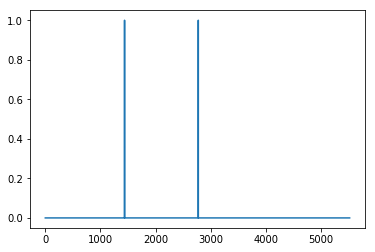

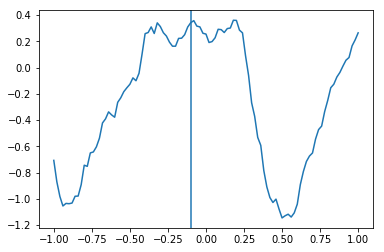

100761


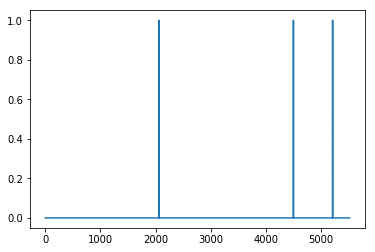

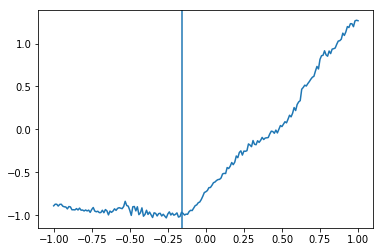

100762


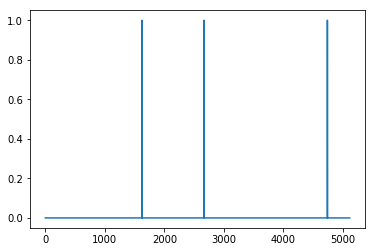

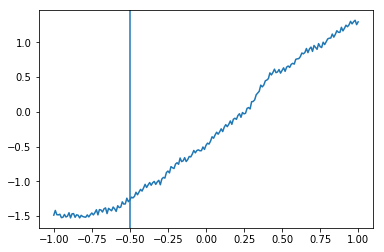

103


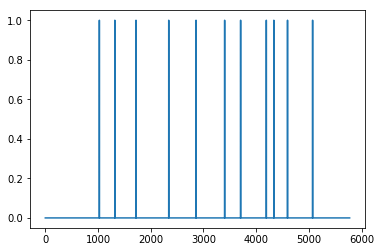

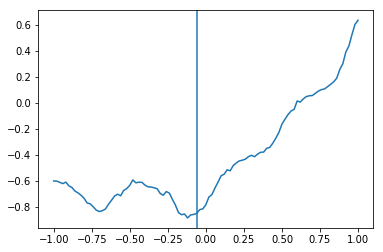

104


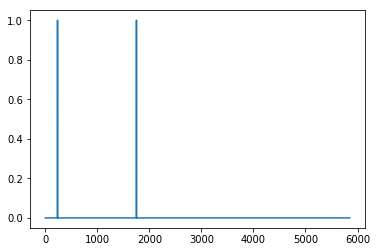

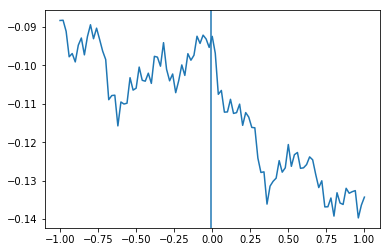

100106


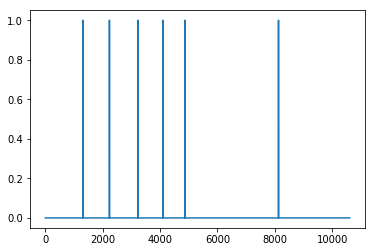

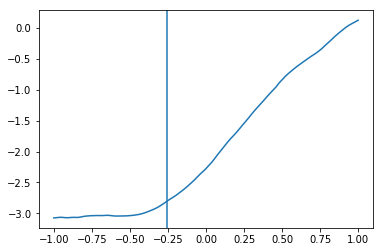

B34


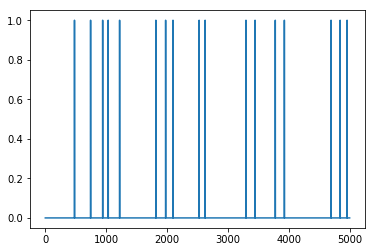

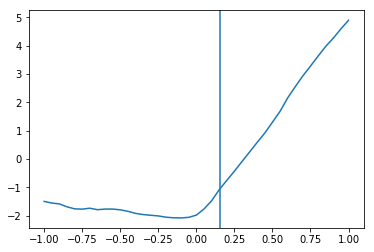

B35


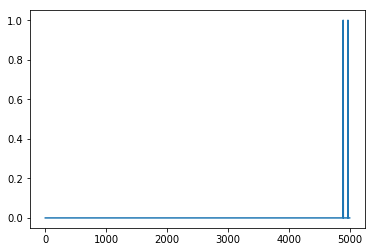

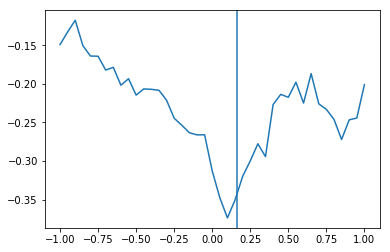

B36


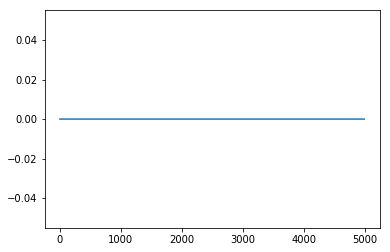

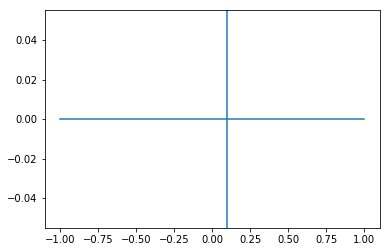

B37


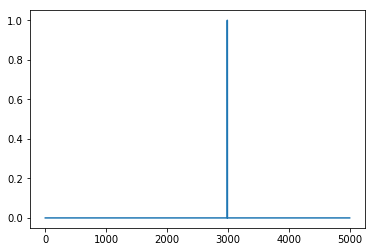

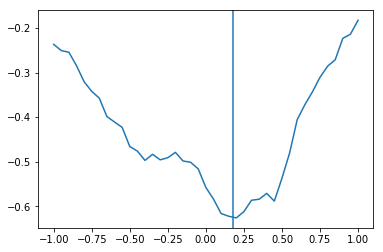

B38


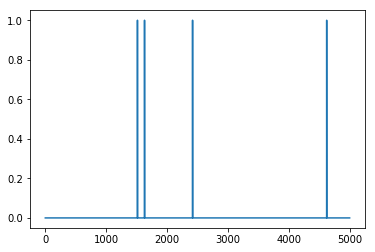

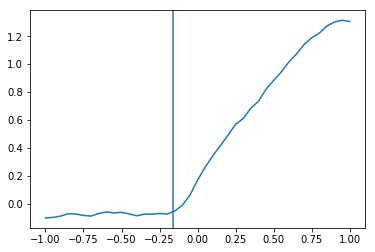

B39


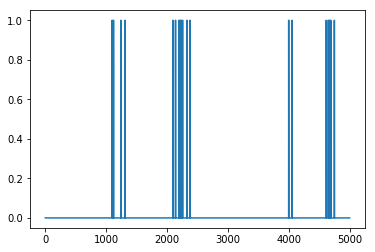

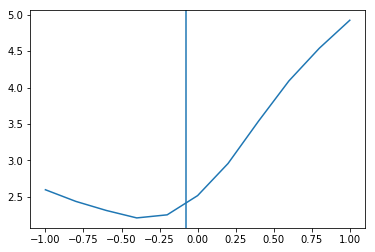

B40


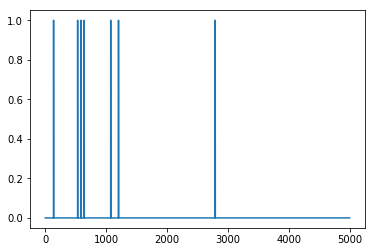

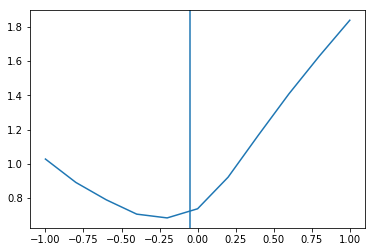

B41


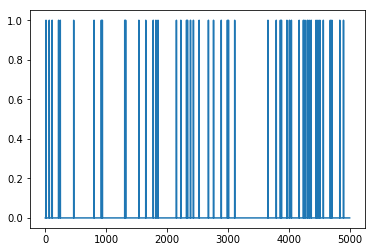

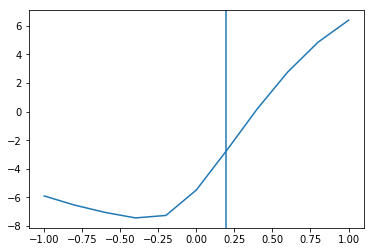

B42


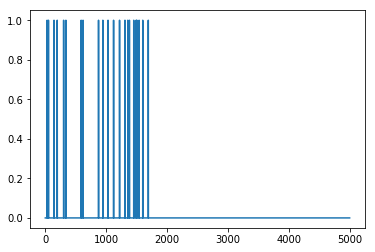

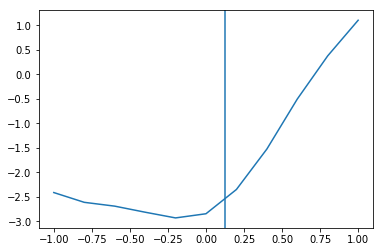

B43


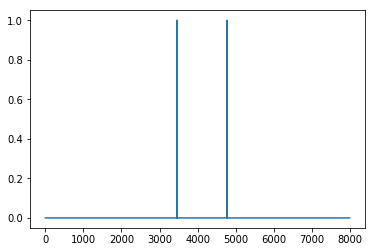

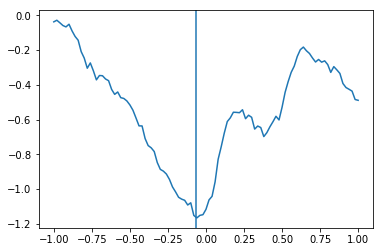

B180


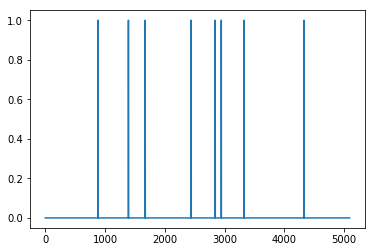

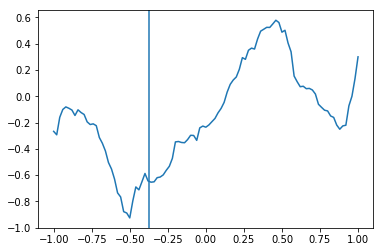

B182


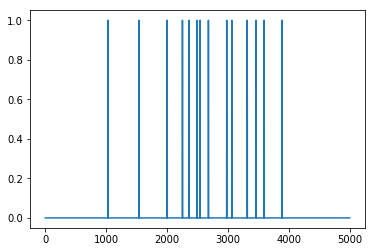

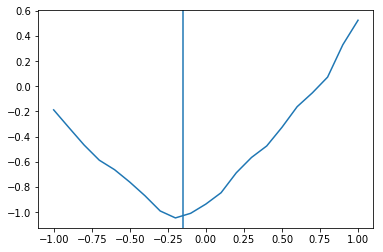

B183


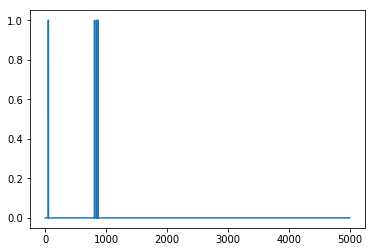

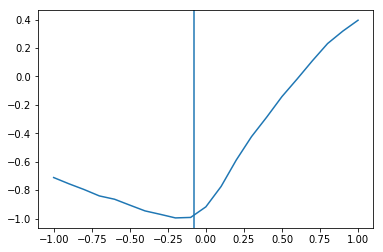

B192


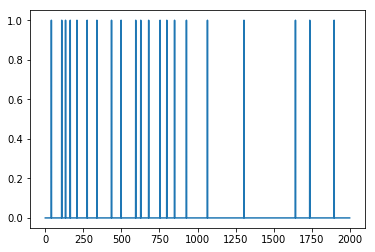

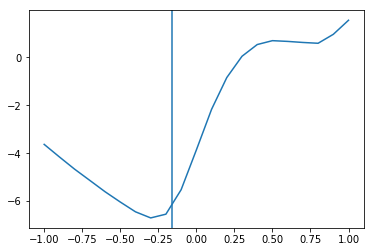

B193


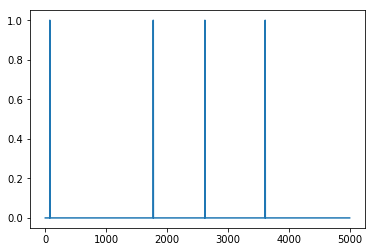

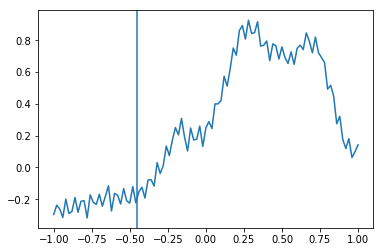

B194


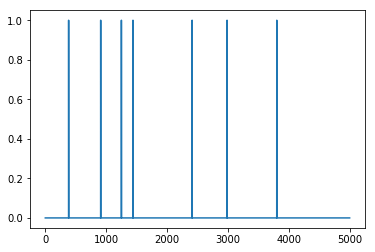

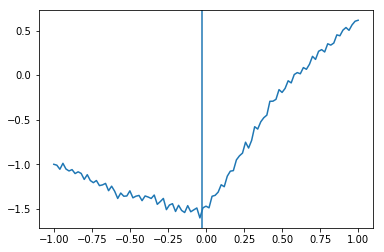

B195


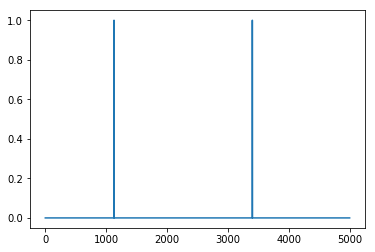

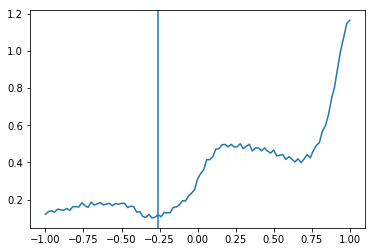

100234


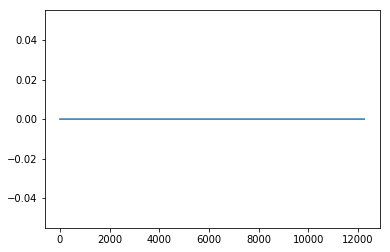

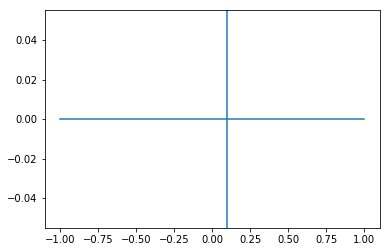

100609


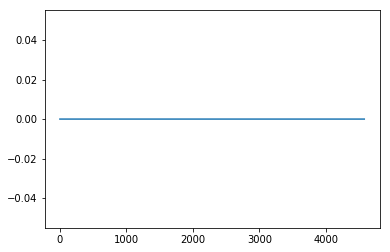

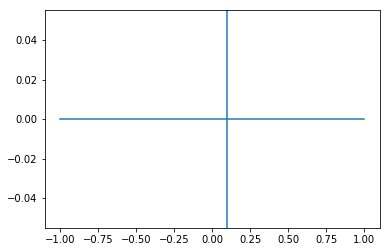

981


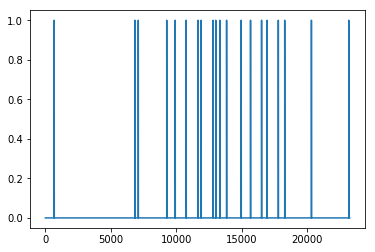

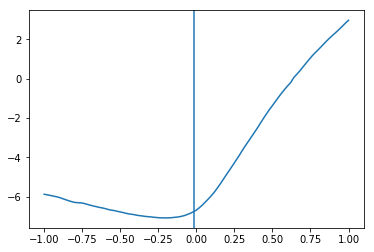

100133


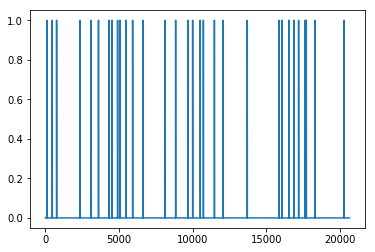

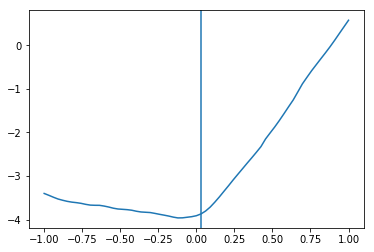

B993


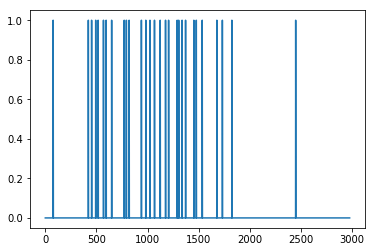

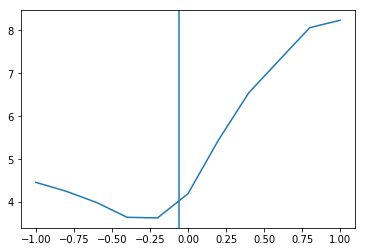

B1037


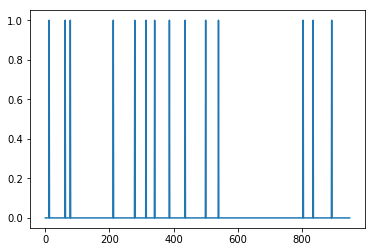

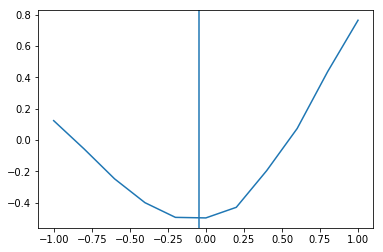

B1047


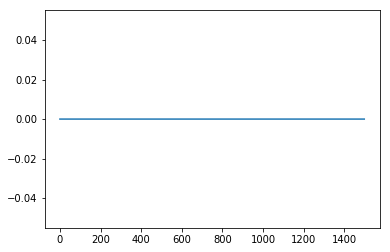

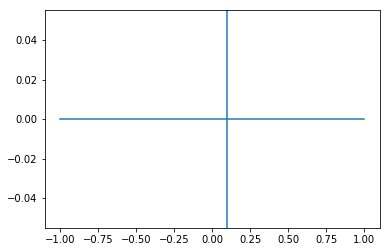

249


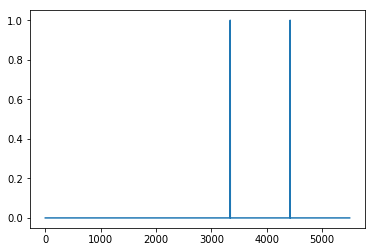

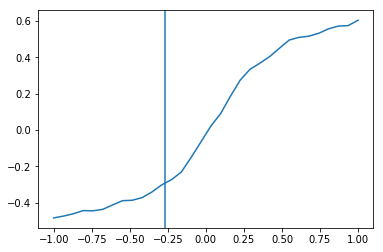

370


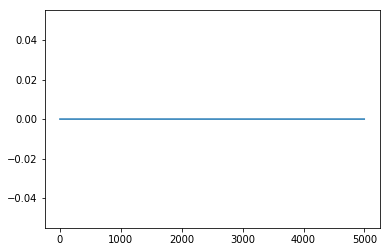

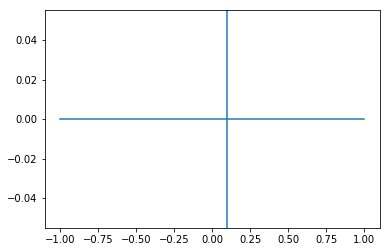

371


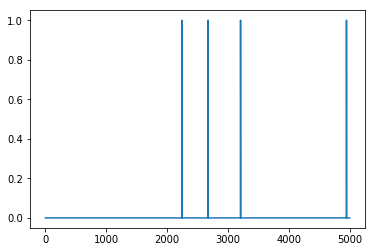

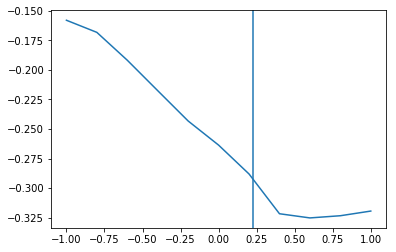

B1070


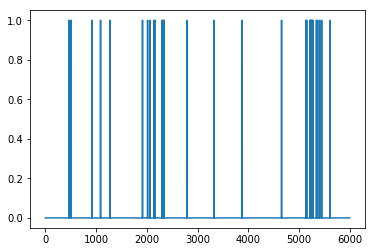

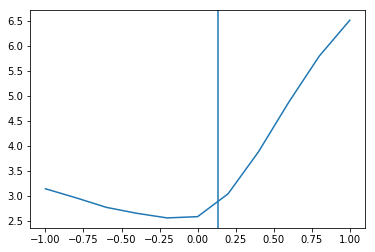

B1125


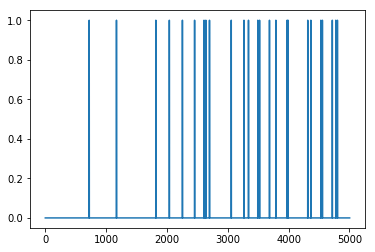

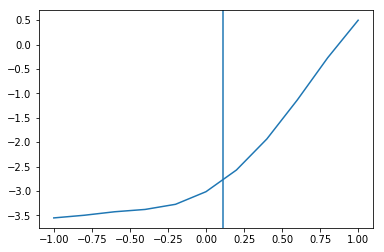

B1126


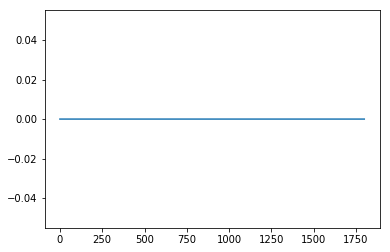

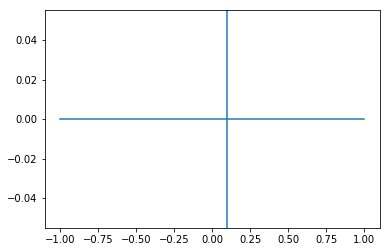

B1128


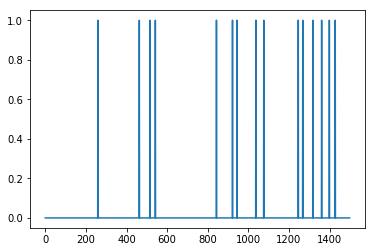

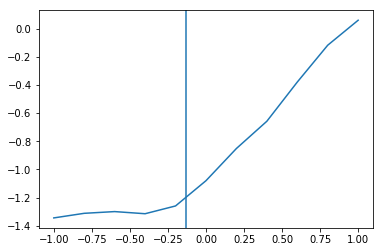

100160


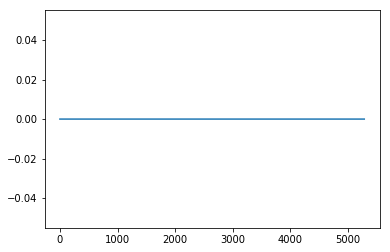

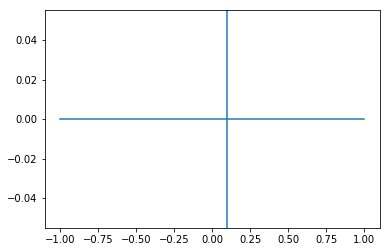

B1073


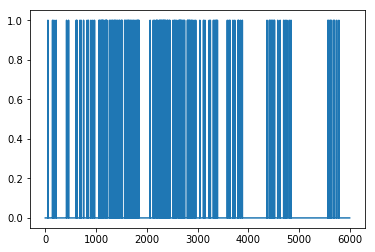

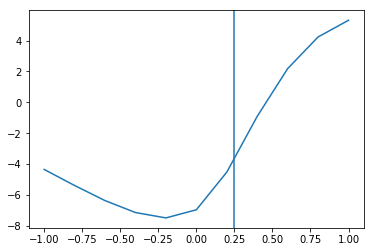

B1075


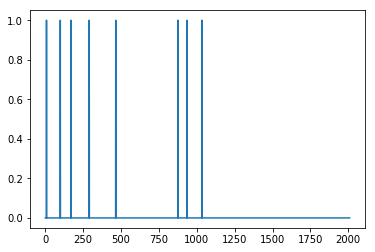

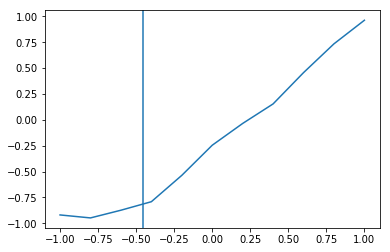

B1080


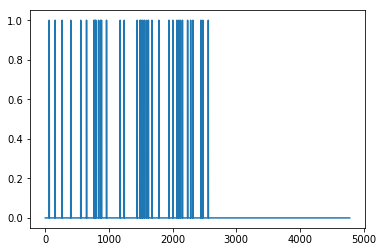

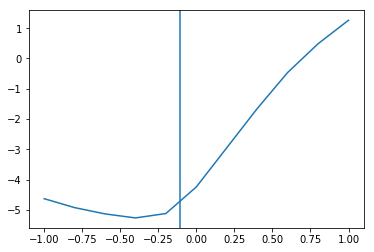

B1090


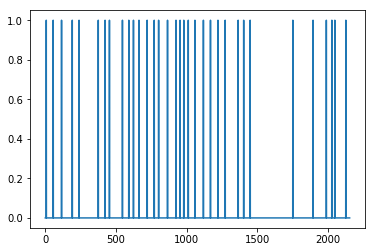

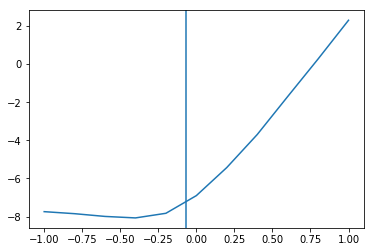

B66


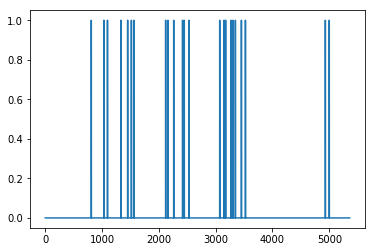

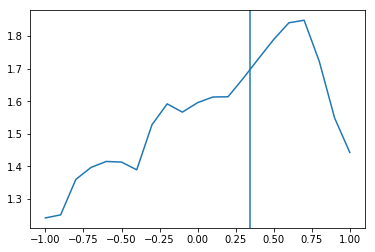

B70


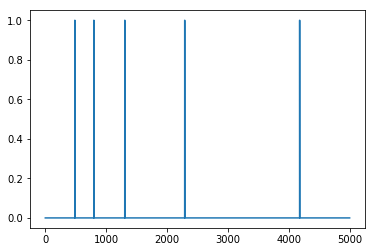

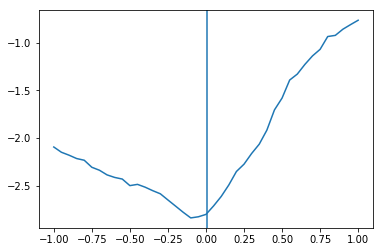

B74


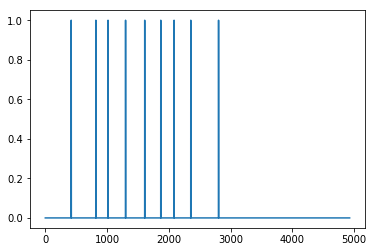

B75


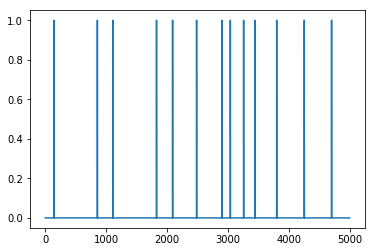

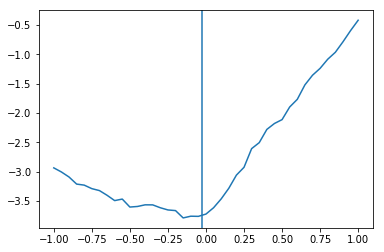

B99


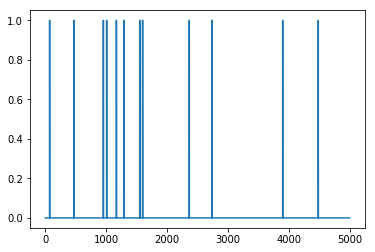

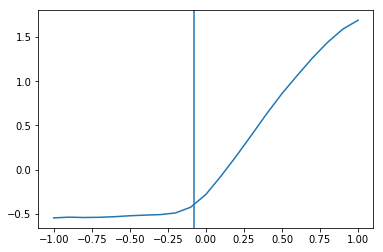

B100


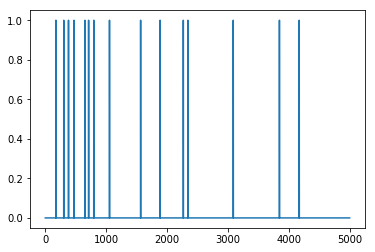

ValueError: cannot convert float NaN to integer

In [70]:
xnew = np.linspace(-1, 1, num=200, endpoint=True)
k=np.zeros(300)

for i in chain(range(95), range(96,135), range(136, 244), range(245, GoodICFiles.shape[0])):
#for i in range(7,10):
    #try:
        if GoodICFiles.iloc[i]['WalkRegressor'] != '':
            TS=loadmat(GoodICFiles.iloc[i]['TSfile'].replace('/','\\').replace('\\media\\NAS','Z:\\GrunwaldKadow_group').replace('.mat','GoodIC.mat'))['TSgoodIC']

            try:
                Regressor =loadmat(GoodICFiles.iloc[i]['WalkRegressor'].replace('kd',''))['R']
            except:
                try:
                    Regressor =loadmat(GoodICFiles.iloc[i]['WalkRegressor'].replace('kd',''))['Rwalk']
                except:
                    try:
                        Regressor =loadmat(GoodICFiles.iloc[i]['WalkRegressor'].replace('WalkRbinkd','Rbin'))['R']
                    except:
                        try:
                            Regressor =loadmat(GoodICFiles.iloc[i]['WalkRegressor'].replace('Rbinkd','Rbin'))['Rbin']
                        except:
                            Regressor =loadmat(GoodICFiles.iloc[i]['WalkRegressor'].replace('kd',''))['Rbin']

            if Regressor.shape[0]<Regressor.shape[1]:
                Regressor=Regressor.T
            if TS.shape[0]>TS.shape[1]:
                TS=TS.T            
            if TS.shape[1]==(Regressor.shape[0]+2):
                TS=TS[:,1:Regressor.shape[0]+1]      
            if TS.shape[1]==(Regressor.shape[0]+1):
                TS=TS[:,1:Regressor.shape[0]]   
                
            if TS.shape[1]==(Regressor.shape[0]+3):
                TS=TS[:,2:Regressor.shape[0]-1]    
            if TS.shape[1]==(Regressor.shape[0]-1):
                Regressor=Regressor[1:Regressor.shape[0]]    

            if TS.shape[1]==(Regressor.shape[0]-2):
                Regressor=Regressor[1:Regressor.shape[0]-1]    
            if TS.shape[1]==(Regressor.shape[0]-3):
                Regressor=Regressor[2:Regressor.shape[0]-1] 
            if TS.shape[1]==(Regressor.shape[0]-4):
                Regressor=Regressor[2:Regressor.shape[0]-2]                 
            if TS.shape[1]==(Regressor.shape[0]-1):
                Regressor=Regressor[1:Regressor.shape[0]]    
            if TS.shape[1]==(Regressor.shape[0]-6):
                Regressor=Regressor[3:Regressor.shape[0]-3]     
            if TS.shape[1]==(Regressor.shape[0]-5):
                Regressor=Regressor[3:Regressor.shape[0]-2]                     
            if TS.shape[1]==(Regressor.shape[0]+2):
                TS=TS[:,1:Regressor.shape[0]+1]
            if TS.shape[1]==(Regressor.shape[0]+1):
                TS=TS[:,0:Regressor.shape[0]]                 
            if TS.shape[1]==(Regressor.shape[0]+6):
                TS=TS[:,3:TS.shape[1]-3]    
              
            if TS.shape[1]!=(Regressor.shape[0]): 
                TS=TS[:,int(GoodICFiles.iloc[i]['TSlowlimWalk']):int(GoodICFiles.iloc[i]['TShighlimWalk']+1)]
                
            if Regressor.shape[0]<Regressor.shape[1]:
                Regressor=Regressor.T

            if TS.shape[1]==(Regressor.shape[0]+2):
                TS=TS[:,1:Regressor.shape[0]+1]
            if TS.shape[1]==(Regressor.shape[0]+1):
                TS=TS[:,1:Regressor.shape[0]]            
            if TS.shape[1]==(Regressor.shape[0]+3):
                TS=TS[:,2:Regressor.shape[0]-1]    
            if TS.shape[1]==(Regressor.shape[0]-1):
                Regressor=Regressor[1:Regressor.shape[0]]    

            if TS.shape[1]==(Regressor.shape[0]-2):
                Regressor=Regressor[1:Regressor.shape[0]-1]    
            if TS.shape[1]==(Regressor.shape[0]-3):
                Regressor=Regressor[2:Regressor.shape[0]-1] 
            if TS.shape[1]==(Regressor.shape[0]-4):
                Regressor=Regressor[2:Regressor.shape[0]-2]                 
            if TS.shape[1]==(Regressor.shape[0]-1):
                Regressor=Regressor[1:Regressor.shape[0]]    
            if TS.shape[1]==(Regressor.shape[0]-6):
                Regressor=Regressor[3:Regressor.shape[0]-3]                        
            if TS.shape[1]==(Regressor.shape[0]+2):
                TS=TS[:,1:Regressor.shape[0]+1]
            if TS.shape[1]==(Regressor.shape[0]+1):
                TS=TS[:,0:Regressor.shape[0]]  


            FR=GoodICFiles.iloc[i]['FR']
            #if len(TS)!=1 and pd.isnull(FR)==False:
            if len(TS)!=1 and FR>4:
                print(GoodICFiles.iloc[i]['expID'])

                Ron=np.zeros(len(Regressor))
                Roff=np.zeros(len(Regressor))
                for m in range(int(1*FR),int(len(Regressor)-1*FR)):
                    if Regressor[m]==1 and all(Regressor[int(m-1*FR):int(m)]==0) and (np.mean(Regressor[int(m+1):int(m+1*FR)])>0.5):
                        Ron[m]=1                        
                    if Regressor[m]==1 and all(Regressor[int(m+1):int(m+1*FR)]==0) and (np.mean(Regressor[int(m-1*FR):int(m-1)])>0.5):
                        Roff[m+1]=1                    

                plt.plot(Ron)
                plt.show()

                for j in range(len(TS)): 
                    if len(list(Compdf.loc[(Compdf.TSfile == GoodICFiles.iloc[i]['TSfile']) & (Compdf.CompNum == j)]['CompID']))!=0:
                        RegName=list(Compdf.loc[(Compdf.TSfile == GoodICFiles.iloc[i]['TSfile']) & (Compdf.CompNum == j)]['CompID'])[0]

                        if (np.isnan(np.mean(TS[j,:]))==False) and (CompOrder[CompOrder[0]==RegName].empty == False):
                            TS[j,:]=TS[j,:]/np.nanmax(TS[j,:])
                            Corr=scipy.signal.correlate(TS[j,:],np.squeeze(Regressor.T))
                            Corrloc=Corr[int((len(Corr)-1)/2-FR):int((len(Corr)-1)/2+FR)+1]
                            x = np.linspace(-1, 1, num=len(Corrloc), endpoint=True)
                            Corrlocint=scipy.interpolate.interp1d(x,Corrloc, kind='cubic')
                            CompCorronoff200[i,list(CompOrder[CompOrder[0]==RegName].index)[0],:]=CompCorronoff200[i,list(CompOrder[CompOrder[0]==RegName].index)[0],:]+Corrlocint(xnew)


                            Corr=scipy.signal.correlate(TS[j,:],np.squeeze(Ron.T))
                            #lags = scipy.signal.correlation_lags(len(TS[j,:])/FR)
                            Corrloc=Corr[int((len(Corr)-1)/2-FR):int((len(Corr)-1)/2+FR)+1]
                            Corrloc50=Corr[int(((len(Corr)-1)/2)-FR):int(((len(Corr)-1)/2)+0.5*FR)+1]
                            x = np.linspace(-1, 1, num=len(Corrloc), endpoint=True)
                            x50 = np.linspace(-1, 0.5, num=len(Corrloc50), endpoint=True)
                            Corrlocint=scipy.interpolate.interp1d(x,Corrloc, kind='cubic')
                            y0=np.mean(Corrloc)
                            yb=np.max(Corrloc)

                            #C=Corrloc
                            #res = scipy.optimize.minimize(Sq,x0=[-0.5,y0,yb-y0])
                            #p=res.x[0]

                            #p , e = optimize.curve_fit(lambda x, x0:piecewise_linear(x,x0,y0,0.001,yb-y0), xa, Corrloc,p0=0)

                            p , e = optimize.curve_fit(piecewise_linear, x50, Corrloc50,p0=[0.1,y0,0.001,yb-y0],bounds=([-0.5,y0-0.5*abs(y0)-1,-1,(yb-y0)-abs(yb-y0)-1],[0.5,(y0+0.5*abs(y0))+1,1,(yb-y0)+abs(yb-y0)+1]),method='trf')
                            CompCorron200[i,list(CompOrder[CompOrder[0]==RegName].index)[0],:]=CompCorron200[i,list(CompOrder[CompOrder[0]==RegName].index)[0],:]+Corrlocint(xnew)
                            Compdf.loc[(Compdf.TSfile == GoodICFiles.iloc[i]['TSfile']) & (Compdf.CompNum == j),'OnTime']=p[0]
                            CompCorron200Time[i,list(CompOrder[CompOrder[0]==RegName].index)[0]]=CompCorron200Time[i,list(CompOrder[CompOrder[0]==RegName].index)[0]]+p[0]
                            k[list(CompOrder[CompOrder[0]==RegName].index)[0]]= k[list(CompOrder[CompOrder[0]==RegName].index)[0]]+1

                            if j==3:
                                plt.plot(x,Corrloc)
                                plt.axvline(x=p[0])
                                xd = np.linspace(-1, 1, 100)
                                #plt.plot(xd, piecewise_linear(xd, *p))
                                #plt.plot(x,[model(int(i),res.x[0],res.x[1],res.x[2])for i in x])
                                plt.show()   

                            Corr=scipy.signal.correlate(TS[j,:],np.squeeze(Roff.T))
                            Corrloc=Corr[int((len(Corr)-1)/2-FR):int((len(Corr)-1)/2+FR)+1]
                            x = np.linspace(-1, 1, num=len(Corrloc), endpoint=True)
                            Corrlocint=scipy.interpolate.interp1d(x,Corrloc, kind='cubic')
                            CompCorroff200[i,list(CompOrder[CompOrder[0]==RegName].index)[0],:]=CompCorroff200[i,list(CompOrder[CompOrder[0]==RegName].index)[0],:]+Corrlocint(xnew)

                del TS


   # except:
     #    continue   
                    # Regress here, cross corr...

In [71]:
i

134

In [73]:
TS.shape[1]

4179

In [72]:
Regressor.shape[0]

4190

In [74]:
GoodICFiles.iloc[i]

index                                                                 40
0                      /media/NAS/Sophie/WalkProject/Vglut/B167-B169/...
FlyID                                                                 59
Templatefile           /media/NAS/Sophie/WalkProject/Vglut/B167-B169/...
TSfile                 /media/NAS/Sophie/WalkProject/Vglut/B167-B169/...
expID                                                               B167
UAS                                                                   6m
GAL4                                                               Vglut
Correspondance         IPS-Y,IPS-Y,AL,WPENb,AL,IPS-Y, ,PN,WPENb,WPENb...
RegionFile             Z:\GrunwaldKadow_group\Sophie\WalkProject\Vglu...
WalkRegressor          Z:\GrunwaldKadow_group\Sophie\WalkProject\Vglu...
GroomRegressor                                                          
FlailRegressor                                                          
TurnRegressor                                      

In [32]:
np.save('CompCorron.npy',CompCorron200)
np.save('CompCorroff.npy',CompCorroff200)
np.save('CompCorronoff.npy',CompCorronoff200)
np.save('CompKs.npy',k)

In [33]:
CompCorron200=np.load('CompCorron.npy')

In [34]:
CompCorron200.shape

(271, 89, 200)

In [35]:
CompCorron200n=np.zeros((GoodICFiles.shape[0],len(CompOrder),200))
FRs=np.zeros((GoodICFiles.shape[0],len(CompOrder)))

In [39]:
CompCorron200[np.isnan(CompCorron200)]=0

In [40]:
len(CompOrder)

89

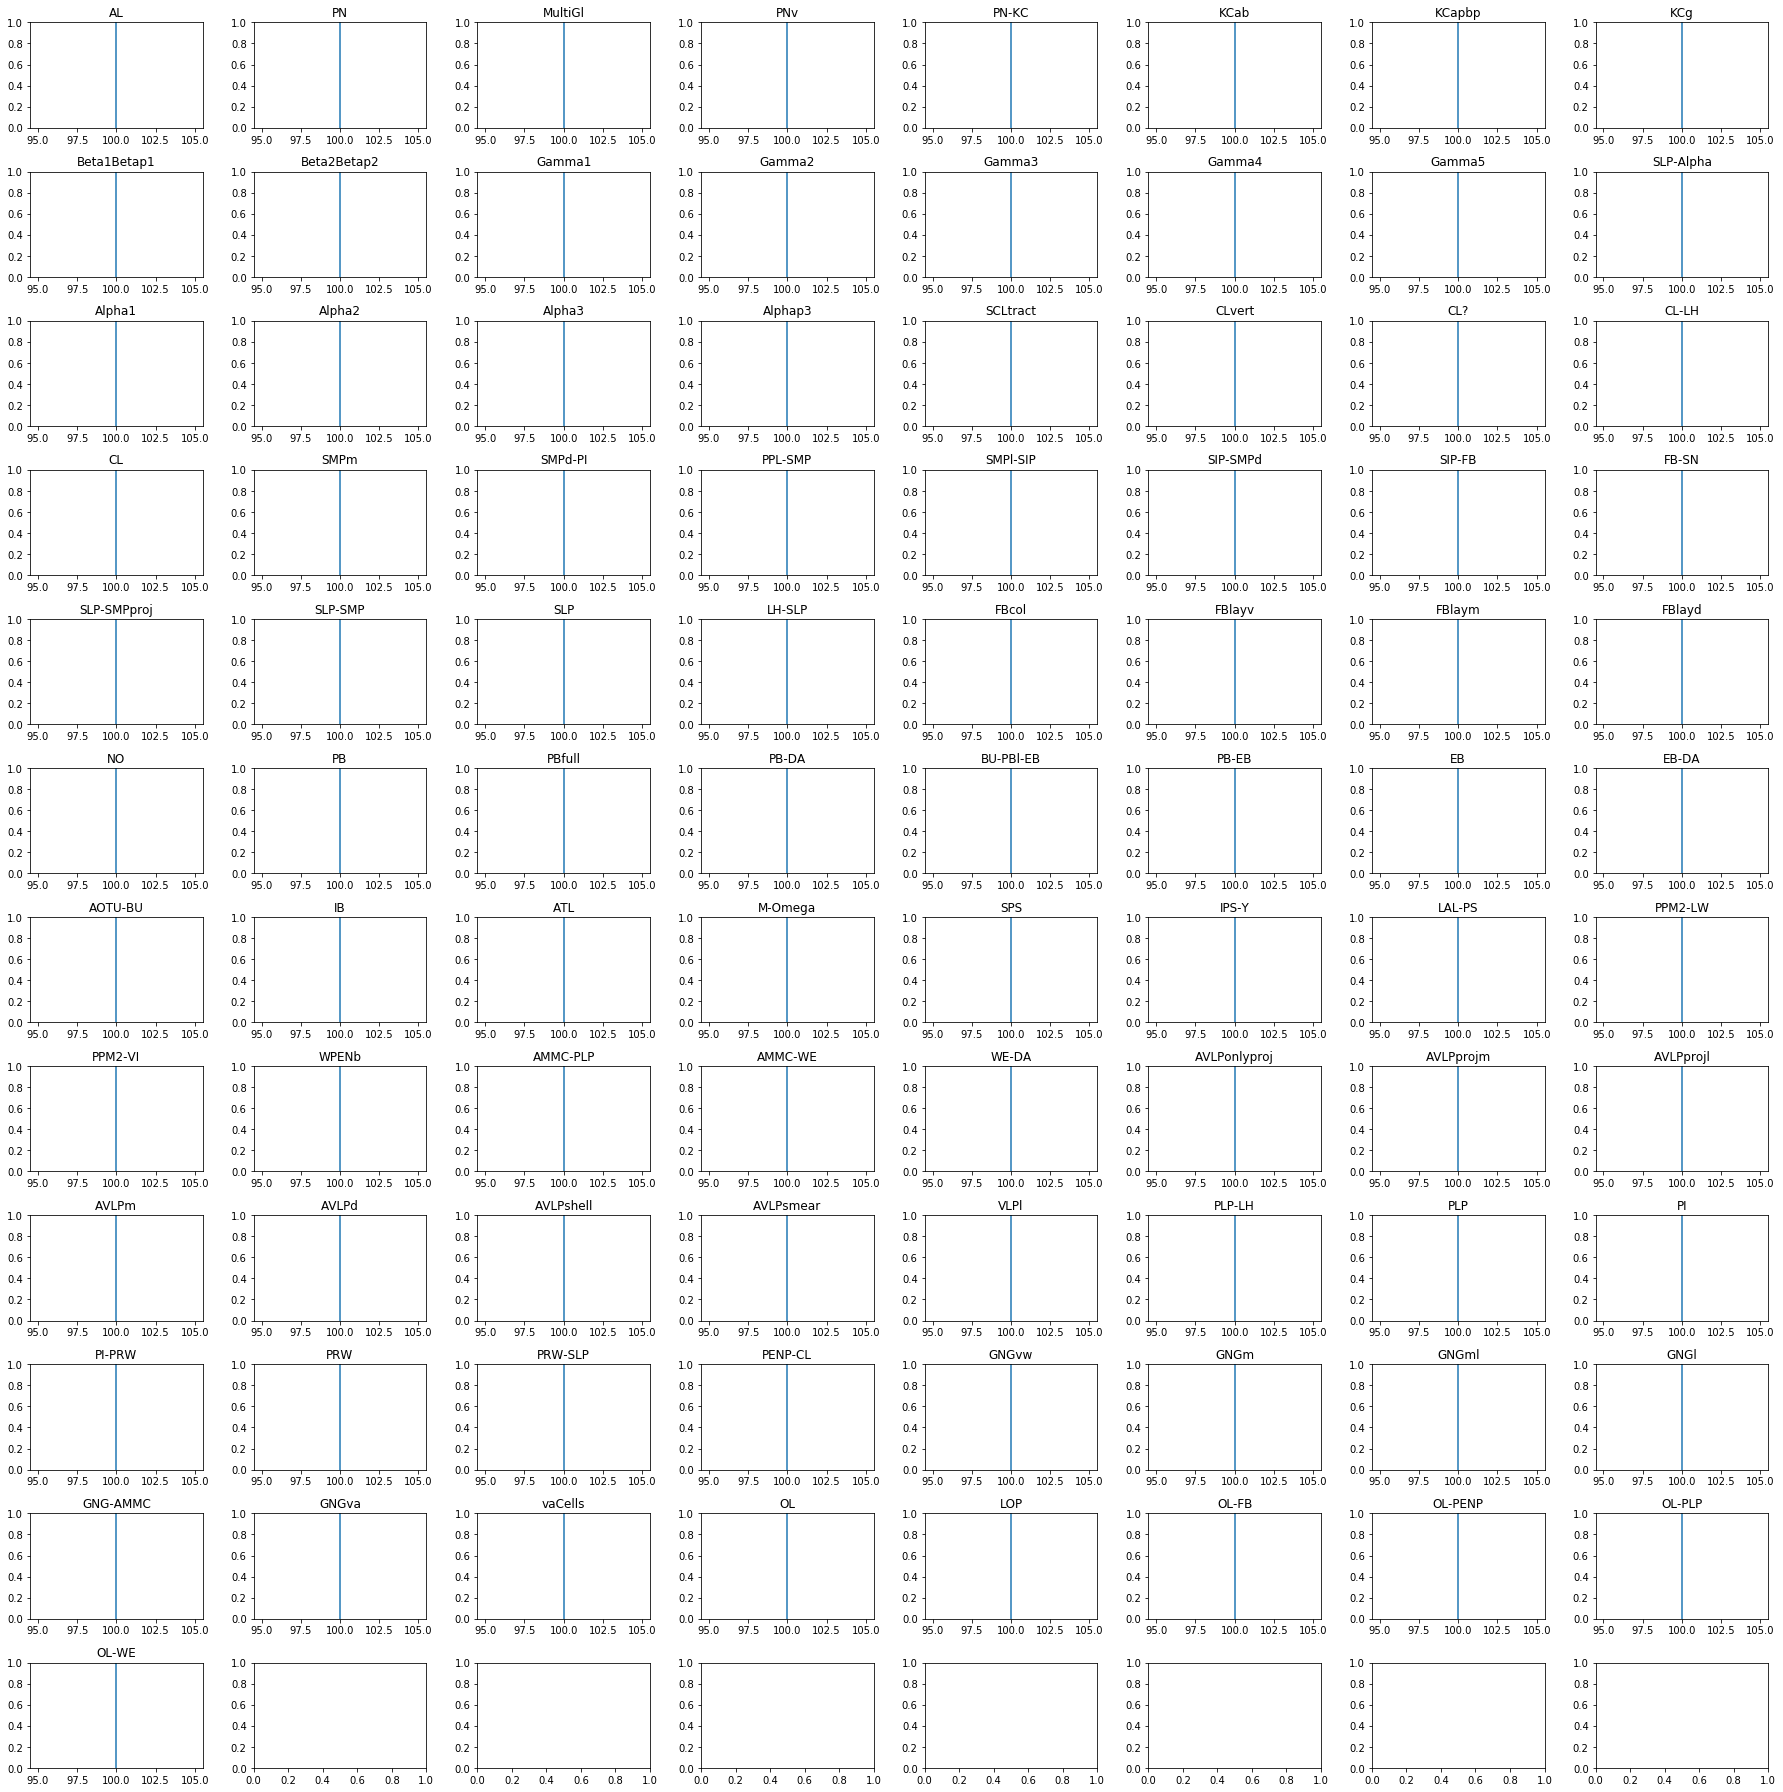

In [41]:
CompCorrOn=np.zeros((len(CompOrder),200))
fig, axs = plt.subplots(12, 8,figsize=(25,25))
for j in range(len(CompOrder)):
    for i in range(GoodICFiles.shape[0]):
        if (np.nanmax(CompCorron200[i,j,:])-np.nanmin(CompCorron200[i,j,:]))!=0 and k[j]>3:
            
            CompCorrOn[j,:]=CompCorrOn[j,:]+(CompCorron200[i,j,:]-np.nanmin(CompCorron200[i,j,:]))/(np.nanmax(CompCorron200[i,j,:])-np.nanmin(CompCorron200[i,j,:]))
            CompCorron200n[i,j,:]=(CompCorron200[i,j,:]-np.nanmin(CompCorron200[i,j,:]))/(np.nanmax(CompCorron200[i,j,:])-np.nanmin(CompCorron200[i,j,:]))
            FRs[i,j]=GoodICFiles.iloc[i]['FR']
            axs[int(np.floor(j/8)),j-int(np.floor(j/8)*8)].plot((CompCorron200[i,j,:]-np.nanmin(CompCorron200[i,j,:]))/(np.nanmax(CompCorron200[i,j,:])-np.nanmin(CompCorron200[i,j,:])))
    axs[int(np.floor(j/8)),j-int(np.floor(j/8)*8)].set_title(CompOrder[0][j]) 
    axs[int(np.floor(j/8)),j-int(np.floor(j/8)*8)].axvline(x=100)

#    except:
  #       continue   
plt.tight_layout()
plt.show()

In [20]:
CompCorrOnOff=np.zeros((len(CompOrder),200))
for i in range(GoodICFiles.shape[0]):
    for j in range(len(CompOrder)):
        CompCorrOnOff[j,:]=CompCorrOnOff[j,:]+CompCorronoff200[i,j,:]
#    except:
  #       continue      

In [21]:
CompCorrOff=np.zeros((len(CompOrder),200))
for i in range(GoodICFiles.shape[0]):
    for j in range(len(CompOrder)):
        CompCorrOff[j,:]=CompCorrOff[j,:]+CompCorroff200[i,j,:]
#    except:
  #       continue      

In [25]:
CompCorron200n[CompCorron200n==0]=np.nan

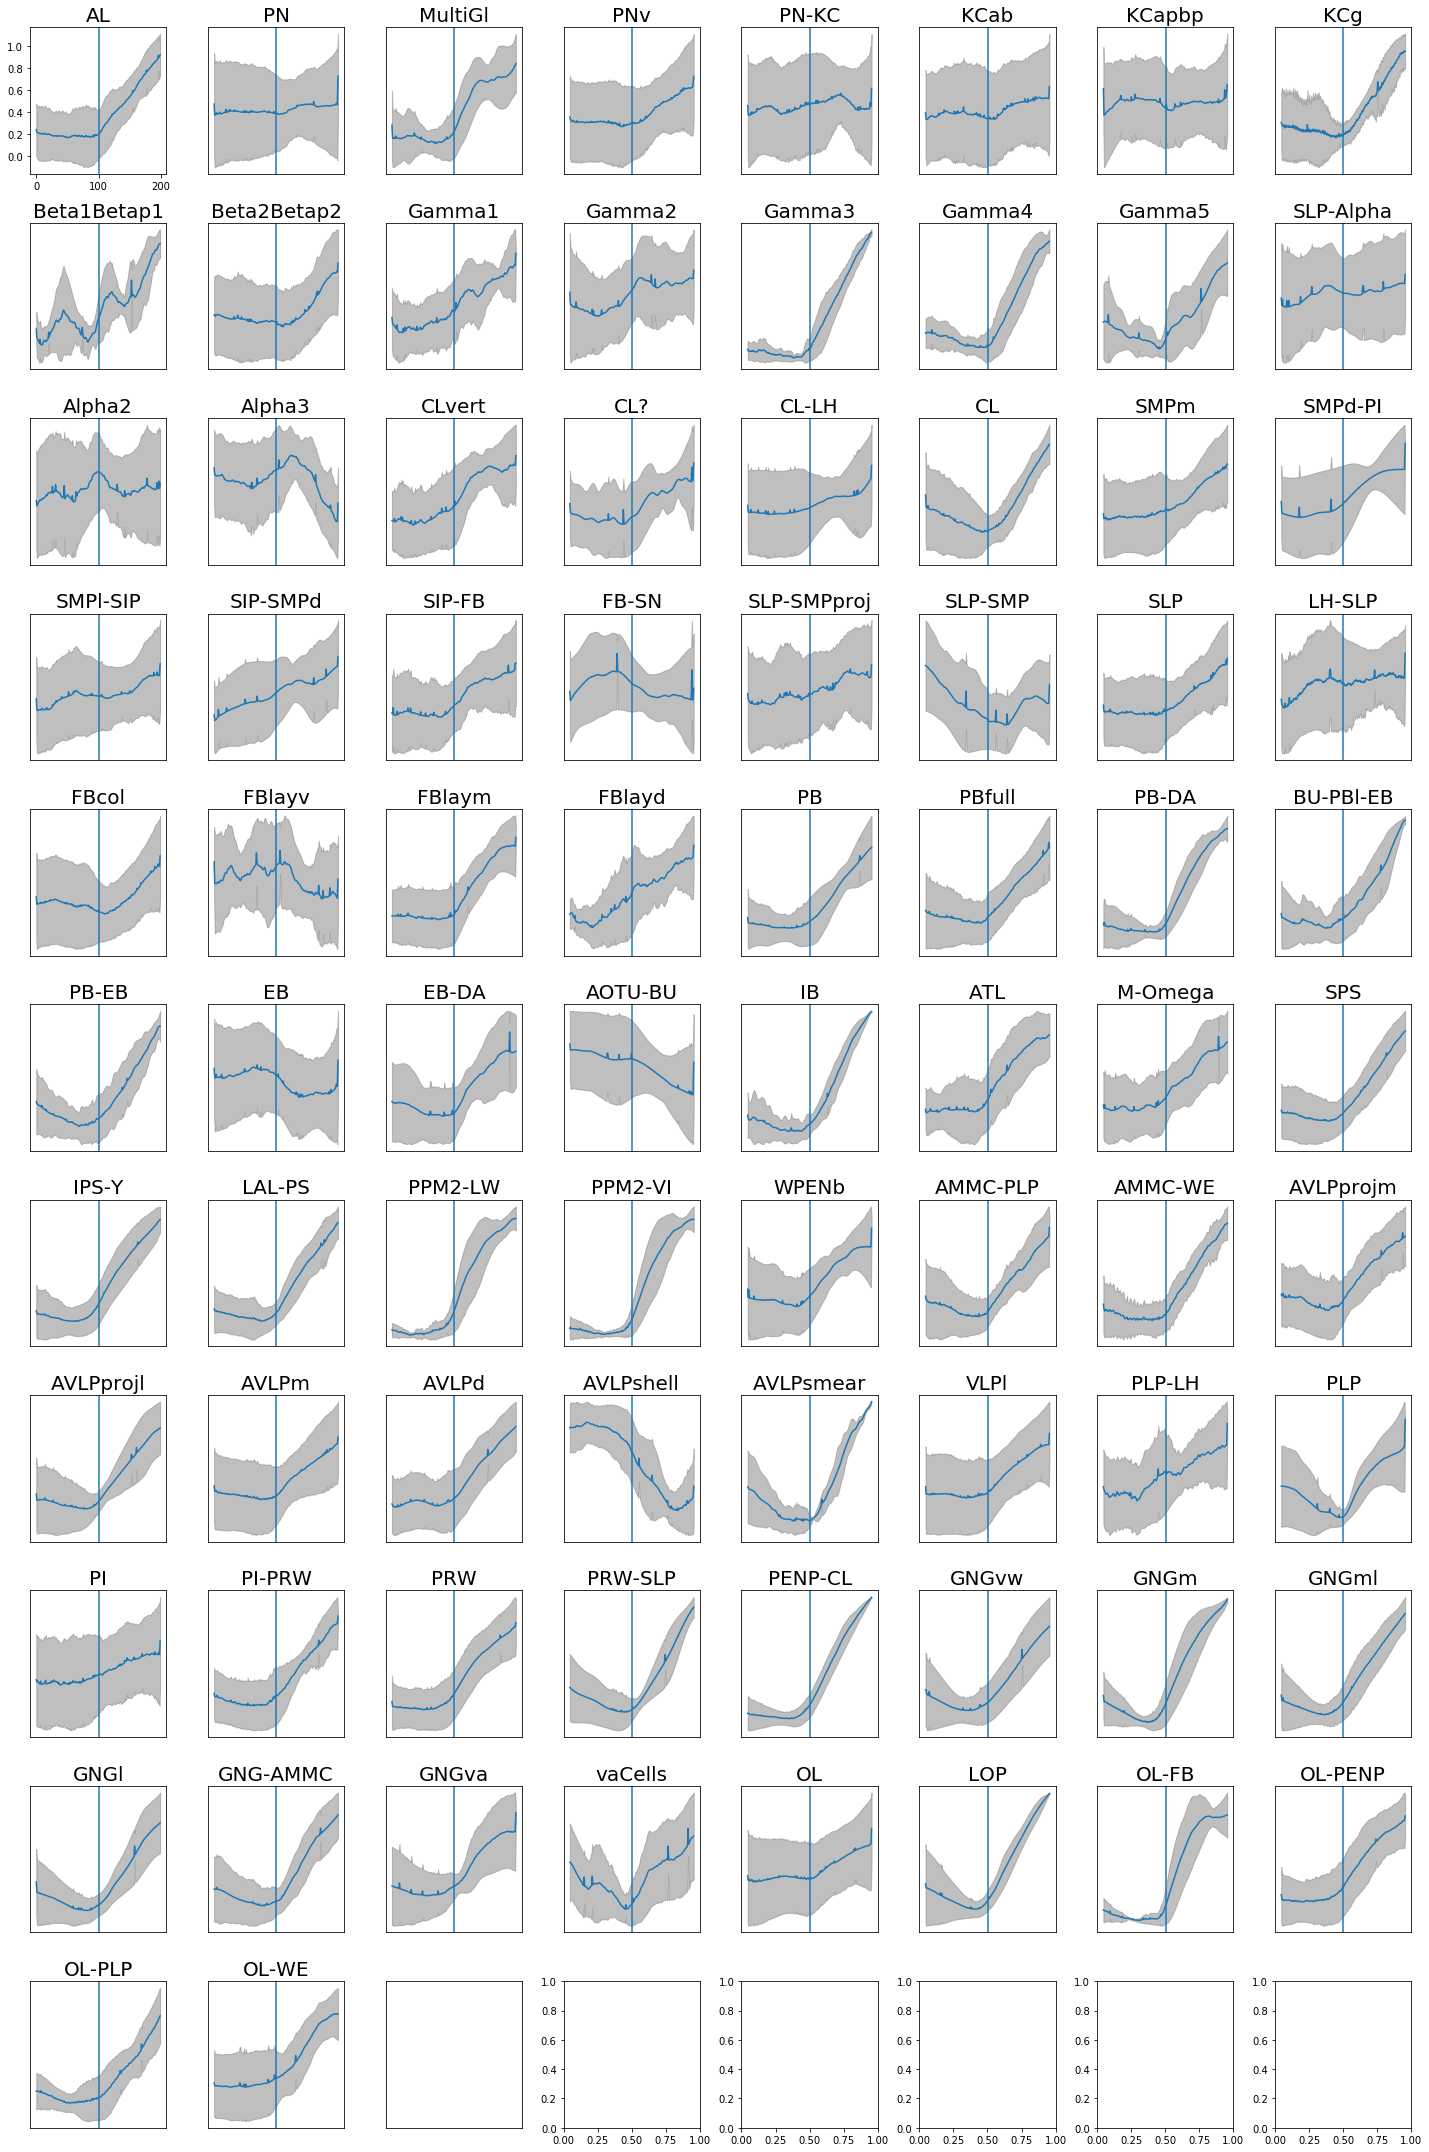

In [32]:
fig, axs = plt.subplots(11, 8,figsize=(20,30))
j=0
for l in range(len(CompOrder)):
    if k[l]>4:
        err=np.nanstd(CompCorron200n[:,l,:],axis=0)#/np.sqrt(k[l])
        axs[int(np.floor(j/8)),j-int(np.floor(j/8)*8)].plot(np.nanmean(CompCorron200n[:,l,:],axis=0))
        #axs[int(np.floor(j/8)),j-int(np.floor(j/8)*8)].plot(err+np.nanmean(CompCorron200n[:,j,:],axis=0))
       # axs[int(np.floor(j/8)),j-int(np.floor(j/8)*8)].plot(np.nanmean(CompCorron200n[:,j,:],axis=0)-err)
        axs[int(np.floor(j/8)),j-int(np.floor(j/8)*8)].set_title(CompOrder[0][l],fontsize=20) 
        axs[int(np.floor(j/8)),j-int(np.floor(j/8)*8)].axvline(x=100)
       # axs[int(np.floor(j/8)),j-int(np.floor(j/8)*8)].fill_between((np.nanmean(CompCorron200n[:,j,:],axis=0)-err), (np.nanmean(CompCorron200n[i,j,:],axis=0)+err),color='grey',alpha=0.5)  
        axs[int(np.floor(j/8)),j-int(np.floor(j/8)*8)].fill_between(range(200),np.nanmean(CompCorron200n[:,l,:],axis=0)-err,err+np.nanmean(CompCorron200n[:,l,:],axis=0),color='grey',
                     alpha=0.5)  
        j=j+1
        axs[int(np.floor(j/8)),j-int(np.floor(j/8)*8)].get_xaxis().set_visible(False)
        axs[int(np.floor(j/8)),j-int(np.floor(j/8)*8)].get_yaxis().set_visible(False)
    #print(np.nanmax(CompCorrOnOff[j,:]))
plt.tight_layout()    
plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure6\Fig6CorronComponents.svg')
plt.show()  

In [ ]:
np.nanmean(CompCorron200n[2,:,:],axis=0)

In [ ]:
((np.nanmean(CompCorron200[j,:,:],axis=0)-err)).shape

In [ ]:
fig, axs = plt.subplots(10, 9,figsize=(20,18))


for j in range(len(CompOrder)):
    axs[int(np.floor(j/8)),j-int(np.floor(j/8)*8)].plot(CompCorrOnOff[j,:]/np.nanmax(CompCorrOnOff[j,:]))
    axs[int(np.floor(j/8)),j-int(np.floor(j/8)*8)].set_title(CompOrder[j]) 
    axs[int(np.floor(j/8)),j-int(np.floor(j/8)*8)].axvline(x=100)
    
plt.show()  

# Histogram of onset time compared to onset time GNG

In [10]:
Corron200Time.shape

(271, 41)

In [12]:
NameList[14]

'GNG'

In [14]:
DeltaTime=np.zeros((271,41))

In [19]:

k=np.zeros((41))
for i in range(GoodICFiles.shape[0]):
    for j in range(41):
        DeltaTime[i,j]=Corron200Time[i,j]-Corron200Time[i,14]
    if np.mean(DeltaTime[i,j])<0:
        print(GoodICFiles.iloc[i]['GAL4'])
DeltaTime[DeltaTime==0]=np.nan        
            

GMR57C10
Nsyb
Nsyb
Nsyb
Nsyb
Nsyb
Nsyb
Nsyb
Nsyb
Nsyb
GMR57C10
nan
Cha
Cha
Cha
Vglut
Vglut
Vglut
Vglut
Vglut
Vglut
Gad
Gad
Gad
Gad
TH
TH
Trh
Trh
Trh
Trh
TDC
TDC


([array([ 0.,  0.,  2.,  3.,  2., 14., 15.,  2.,  1.,  2.]),
  array([ 0.,  0.,  0.,  0.,  1., 12., 17.,  2.,  1.,  0.]),
  array([ 0.,  0.,  1.,  3.,  6., 20., 11.,  4.,  0.,  0.]),
  array([ 0.,  0.,  0.,  1.,  3., 21.,  8.,  3.,  0.,  1.]),
  array([ 0.,  0.,  1.,  2.,  1., 12., 19.,  2.,  0.,  1.]),
  array([ 0.,  0.,  0.,  5.,  5., 15., 14.,  3.,  1.,  0.]),
  array([ 0.,  0.,  0.,  1.,  2., 13., 13.,  7.,  1.,  0.]),
  array([ 0.,  0.,  0.,  3.,  4., 20., 12.,  3.,  0.,  0.]),
  array([ 0.,  0.,  2.,  2.,  3., 16., 11.,  4.,  0.,  1.]),
  array([ 0.,  0.,  0.,  0.,  0.,  7., 19.,  3.,  1.,  0.]),
  array([ 0.,  0.,  1.,  1.,  6., 16., 14.,  0.,  0.,  0.]),
  array([ 0.,  0.,  0.,  0.,  1.,  6., 24.,  1.,  1.,  0.]),
  array([ 0.,  0.,  2.,  2.,  2., 22., 10.,  4.,  0.,  0.]),
  array([ 0.,  0.,  0.,  1.,  2., 11.,  8.,  3.,  0.,  0.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([ 0.,  0.,  0.,  2.,  5., 16., 12.,  4.,  0.,  1.]),
  array([ 0.,  0.,  1.,  1.,  5., 

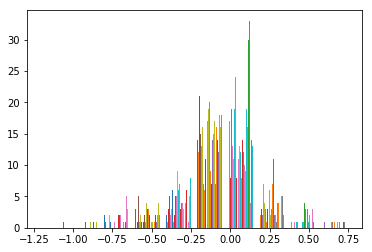

In [16]:
plt.hist(DeltaTime)

# PCA onset times

Are there different types of activity when starting to walk?

In [ ]:
Do PCA on times CompdfTimeon x ExpID, and same Regiondf x ExpID 

## Correlation convolved components

In [ ]:
Corr200Comp=np.zeros((GoodICFiles.shape[0],len(CompOrder),200))

In [ ]:
xnew = np.linspace(-1, 1, num=200, endpoint=True)

for i in range(GoodICFiles.shape[0]):
   # try:
        if GoodICFiles.iloc[i]['WalkRegressor'] != '':

            TS=loadmat(GoodICFiles.iloc[i]['TSfile'].replace('/','\\').replace('\\media\\NAS','Z:\\GrunwaldKadow_group').replace('.mat','GoodIC.mat'))['TSgoodIC']

            Regressor=loadmat(GoodICFiles.iloc[i]['WalkRegressor'])['Rkd']
            
            if Regressor.shape[0]<Regressor.shape[1]:
                Regressor=Regressor.T
            if TS.shape[0]>TS.shape[1]:
                TS=TS.T            
            if TS.shape[1]==(Regressor.shape[0]+2):
                TS=TS[:,1:Regressor.shape[0]+1]
            if TS.shape[1]==(Regressor.shape[0]+1):
                TS=TS[:,1:Regressor.shape[0]]            
            if TS.shape[1]==(Regressor.shape[0]+3):
                TS=TS[:,2:Regressor.shape[0]-1]    
            if TS.shape[1]==(Regressor.shape[0]-1):
                Regressor=Regressor[1:Regressor.shape[0]]    

            if TS.shape[1]==(Regressor.shape[0]-2):
                Regressor=Regressor[1:Regressor.shape[0]-1]    
            if TS.shape[1]==(Regressor.shape[0]-3):
                Regressor=Regressor[2:Regressor.shape[0]-1] 
            if TS.shape[1]==(Regressor.shape[0]-4):
                Regressor=Regressor[2:Regressor.shape[0]-2]    
            if TS.shape[1]==(Regressor.shape[0]-5):
                Regressor=Regressor[2:Regressor.shape[0]-3]                  
            if TS.shape[1]==(Regressor.shape[0]+6):
                TS=TS[:,3:TS.shape[1]-3]   
            if TS.shape[1]==(Regressor.shape[0]-11):
                Regressor=Regressor[5:Regressor.shape[0]-6]  
            if TS.shape[1]<Regressor.shape[0]:    
                Regressor=Regressor[int(GoodICFiles.iloc[i]['TSlowlimWalk']):int(GoodICFiles.iloc[i]['TShighlimWalk']+1)]     
            if TS.shape[1]>Regressor.shape[0]:    
                TS=TS[:,int(GoodICFiles.iloc[i]['TSlowlimWalk']):int(GoodICFiles.iloc[i]['TShighlimWalk']+1)]
           
            if TS.shape[1]==(Regressor.shape[0]-1):
                Regressor=Regressor[1:Regressor.shape[0]]    
            if TS.shape[1]==(Regressor.shape[0]+2):
                TS=TS[:,1:Regressor.shape[0]+1]
            if TS.shape[1]==(Regressor.shape[0]+1):
                TS=TS[:,0:Regressor.shape[0]] 

            FR=GoodICFiles.iloc[i]['FR']
            if len(TS)!=1:
                            #get onset
               
                    
                    
                for j in range(len(TS)):
                    
                #for j in range(2):      
                    if np.isnan(np.mean(TS[j,:]))==False:
                        RegName=Compdf.loc[(Compdf.TSfile == GoodICFiles.iloc[i]['TSfile']) & (Compdf.CompNum == j),['CompID']]
                        
                        Corr=scipy.signal.correlate(TS[j,:],np.squeeze(Regressor.T))
                        Corrloc=Corr[int((len(Corr+1)/2)-FR):int((len(Corr+1)/2)+FR+1)]
                        x = np.linspace(-1, 1, num=len(Corrloc), endpoint=True)
                        Corrlocint=scipy.interpolate.interp1d(x,Corrloc, kind='cubic')
                        Corr200Comp[i,CompOrder.index(RegName),:]=Corr200Comp[i,NameList.index(RegName),:]+Corrlocint(xnew)
                        
                        
                del TS
                
   # except:
    #     continue   
                    # Regress here, cross corr...

In [ ]:
np.save('CompCorrCov.npy',Corr200Conv)

## Correlation convolved regions

Corr200=np.zeros((GoodICFiles.shape[0],41,200))

T87_75=loadmat('C:\\Users\\aimon\\Documents\\GitHub\\FlyLFM\\MatlabFiles\\CompareConditions\\87to75.mat')['VarName3']

GoodICFiles.loc[GoodICFiles['expID'] == '194','FR']=1/0.066

Regionsdf['TimeMax']=np.nan
Compdf['TimeMax']=np.nan

xnew = np.linspace(-1, 1, num=200, endpoint=True)

for i in range(GoodICFiles.shape[0]):
#for i in range(4):
    try:
        
        if GoodICFiles.iloc[i]['WalkRegressor'] != '':

            TS=loadmat(GoodICFiles.iloc[i]['RegionFile'])['TS']
            #TS=loadmat(GoodICFiles.iloc[i]['TSfile'].replace('/','\\').replace('\\media\\NAS','Z:\\GrunwaldKadow_group').replace('.mat','GoodIC.mat'))['TSgoodIC']
            Regressor=loadmat(GoodICFiles.iloc[i]['WalkRegressor'])['Rkd']
            if Regressor.shape[0]<Regressor.shape[1]:
                Regressor=Regressor.T
            if TS.shape[0]>TS.shape[1]:
                TS=TS.T            
            if TS.shape[1]==(Regressor.shape[0]+2):
                TS=TS[:,1:Regressor.shape[0]+1]
            if TS.shape[1]==(Regressor.shape[0]+1):
                TS=TS[:,1:Regressor.shape[0]]            
            if TS.shape[1]==(Regressor.shape[0]+3):
                TS=TS[:,2:Regressor.shape[0]-1]    
            if TS.shape[1]==(Regressor.shape[0]-1):
                Regressor=Regressor[1:Regressor.shape[0]]    

            if TS.shape[1]==(Regressor.shape[0]-2):
                Regressor=Regressor[1:Regressor.shape[0]-1]    
            if TS.shape[1]==(Regressor.shape[0]-3):
                Regressor=Regressor[2:Regressor.shape[0]-1] 
            if TS.shape[1]==(Regressor.shape[0]-4):
                Regressor=Regressor[2:Regressor.shape[0]-2]                 
            if TS.shape[1]==(Regressor.shape[0]-1):
                Regressor=Regressor[1:Regressor.shape[0]]    
            if TS.shape[1]==(Regressor.shape[0]-6):
                Regressor=Regressor[3:Regressor.shape[0]-3]                        
            if TS.shape[1]==(Regressor.shape[0]+2):
                TS=TS[:,1:Regressor.shape[0]+1]
            if TS.shape[1]==(Regressor.shape[0]+1):
                TS=TS[:,0:Regressor.shape[0]]                 

              
            if TS.shape[1]!=(Regressor.shape[0]): 

                TS=TS[:,int(GoodICFiles.iloc[i]['TSlowlimWalk']):int(GoodICFiles.iloc[i]['TShighlimWalk']+1)]
            if Regressor.shape[0]<Regressor.shape[1]:
                Regressor=Regressor.T

            if TS.shape[1]==(Regressor.shape[0]+2):
                TS=TS[:,1:Regressor.shape[0]+1]
            if TS.shape[1]==(Regressor.shape[0]+1):
                TS=TS[:,1:Regressor.shape[0]]            
            if TS.shape[1]==(Regressor.shape[0]+3):
                TS=TS[:,2:Regressor.shape[0]-1]    
            if TS.shape[1]==(Regressor.shape[0]-1):
                Regressor=Regressor[1:Regressor.shape[0]]    

            if TS.shape[1]==(Regressor.shape[0]-2):
                Regressor=Regressor[1:Regressor.shape[0]-1]    
            if TS.shape[1]==(Regressor.shape[0]-3):
                Regressor=Regressor[2:Regressor.shape[0]-1] 
            if TS.shape[1]==(Regressor.shape[0]-4):
                Regressor=Regressor[2:Regressor.shape[0]-2]                 
            if TS.shape[1]==(Regressor.shape[0]-1):
                Regressor=Regressor[1:Regressor.shape[0]]    
            if TS.shape[1]==(Regressor.shape[0]-6):
                Regressor=Regressor[3:Regressor.shape[0]-3]                        
            if TS.shape[1]==(Regressor.shape[0]+2):
                TS=TS[:,1:Regressor.shape[0]+1]
            if TS.shape[1]==(Regressor.shape[0]+1):
                TS=TS[:,0:Regressor.shape[0]]  

      
                # print(np.mean(Regressor))
        #print('\n')
        #print(np.std(Regressor))
        #print('\n')
            #Regi=
            #Regf=
            #TSi=
            #TSf=
            FR=GoodICFiles.iloc[i]['FR']

            if len(TS)!=1:
                
                if len(TS)==87:
                    TS2=TS
                    TS=np.zeros((75,TS.shape[1]))
                    for j in range(75):
                        TS[j,:]=TS2[T87_75[j][0]-1,:]
                for j in range(75):
                #for j in range(2):      
                    if np.isnan(np.nanmean(TS[j,:]))==False:
                        Corr=scipy.signal.correlate(TS[j,:],np.squeeze(Regressor.T))
                        Corrloc=Corr[int((len(Corr)/2)-FR):int((len(Corr)/2)+FR)]
                        x = np.linspace(-1, 1, num=len(Corrloc), endpoint=True)
                        Corrlocint=scipy.interpolate.interp1d(x,Corrloc, kind='cubic')
                        RegName=list(Regionsdf.loc[(Regionsdf['RegionFile'] == GoodICFiles.iloc[i]['RegionFile']) & (Regionsdf['RegionNum'] == j)]['RegionNames'])[0]
                        #print(np.argmax(Corrlocint(xnew)))
                        Regionsdf.loc[(Regionsdf['RegionFile'] == GoodICFiles.iloc[i]['RegionFile']) & (Regionsdf['RegionNum'] == j),'TimeMax']=np.argmax(Corrlocint(xnew))-100
                        Corr200[i,NameList.index(RegName),:]=Corr200[i,NameList.index(RegName),:]+Corrlocint(xnew)
                        #print(Regionsdf.loc[(Regionsdf['RegionFile'] == GoodICFiles.iloc[i]['RegionFile']) & (Regionsdf['RegionNum'] == j)]['TimeMax'])
                        #if j==15:
                            
                           # plt.plot(Corr200[i,NameList.index(RegName),:])
                            
                           # plt.show()
            del TS
                
    except:
         continue   
                    # Regress here, cross corr...

Regionsdf.loc[Regionsdf['TimeMax']==0]=np.nan
Regionsdf.loc[Regionsdf['TimeMax']==199]=np.nan

sns.set_style("whitegrid",{"axes.edgecolor": "0",'grid.color': '0','font.family':'Arial'})
sns.set_context("notebook",font_scale=2)
plt.figure(figsize=(16, 6))
df1=Regionsdf.query('FR >= 50')
df2=df1.query('UAS=="6f" or UAS=="7f" or UAS=="7s" or UAS=="6m" ')

#df2=Regionsdf
df3=df2.query('GAL4=="Nsyb" or GAL4=="GMR57C10"')
#df3=df2.dropna()

b = sns.boxplot(x='RegionNames',y='TimeMax',data=df3,color='g')
for i,box in enumerate(b.artists):
    box.set_edgecolor('black')
    box.set_facecolor('green')

    # iterate over whiskers and median lines
    for j in range(6*i,6*(i+1)):
         b.lines[j].set_color('black')
   

plt.xticks(rotation=90)
plt.xticks(fontsize=15)


#plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure1\R2RegionsAllWalkPAN.svg')
#plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure1\R2TurnipsimcontraredAmines.png')
    
plt.show()

sns.set_style("whitegrid",{"axes.edgecolor": "0",'grid.color': '0','font.family':'Arial'})
sns.set_context("notebook",font_scale=2)
plt.figure(figsize=(16, 6))
df2=Regionsdf.query('UAS=="6f" or UAS=="7f" or  UAS=="6m"')
#df2=Regionsdf
df3=df2.query('GAL4=="TH"')
#df3=df2.dropna()

b = sns.boxplot(x='RegionNames',y='TimeMax',data=df3)
for i,box in enumerate(b.artists):
    box.set_edgecolor('black')
    box.set_facecolor('green')

    # iterate over whiskers and median lines
    for j in range(6*i,6*(i+1)):
         b.lines[j].set_color('black')
   

plt.xticks(rotation=90)
plt.xticks(fontsize=15)


#plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure1\R2RegionsAllWalkPAN.svg')
#plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure1\R2TurnipsimcontraredAmines.png')
    
plt.show()

sns.set_style("whitegrid",{"axes.edgecolor": "0",'grid.color': '0','font.family':'Arial'})
sns.set_context("notebook",font_scale=2)
plt.figure(figsize=(16, 6))
#df2=Regionsdf.query('UAS=="6f" or UAS=="7f" or  UAS=="6m"')
df2=Regionsdf
df3=df2
#df3=df2.dropna()

b = sns.boxplot(x='RegionNames',y='TimeMax',hue='UAS',data=df3)
for i,box in enumerate(b.artists):
    box.set_edgecolor('black')
    #box.set_facecolor('green')

    # iterate over whiskers and median lines
    for j in range(6*i,6*(i+1)):
         b.lines[j].set_color('black')
   

plt.xticks(rotation=90)
plt.xticks(fontsize=15)


#plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure1\R2RegionsAllWalkPAN.svg')
#plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure1\R2TurnipsimcontraredAmines.png')
    
plt.show()

with open('test.npy', 'wb') as f:
    np.save(f, np.array([1, 2]))
    np.save(f, np.array([1, 3]))
with open('test.npy', 'rb') as f:
    a = np.load(f)

Corr200[np.isnan(Corr200)]=0

k=0
CorrTH=np.zeros((41,200))
for i in range(1,GoodICFiles.shape[0]):
   # try:
        if ((GoodICFiles.iloc[i]['GAL4'] == 'TH') ):
            k=k+1
            for j in range(41):
                if np.nanmax(Corr200[i,j,:])!=0:
                    CorrTH[j,:]=CorrTH[j,:]+(Corr200[i,j,:])/(np.nanmax(Corr200[i,j,:]))
CorrTH=CorrTH/k                
#    except:
  #       continue    
CorrTrh=np.zeros((41,200))
k=0
for i in range(1,GoodICFiles.shape[0]):
   # try:
        if ((GoodICFiles.iloc[i]['GAL4'] == 'Trh' and (GoodICFiles.iloc[i]['WalkRegressor'] != ''))):
            k=k+1
            for j in range(41):
                #print(np.mean(Corr200[i,10,:]))
                if np.nanmax(Corr200[i,j,:])!=0:
                    CorrTrh[j,:]=CorrTrh[j,:]+(Corr200[i,j,:])/(np.nanmax(Corr200[i,j,:]))
CorrTrh=CorrTrh/k 
               # plt.plot(Corr200[i,j,:])
               # plt.show()
                #print(np.mean(Corr200[i,j,:]))
CorrTDC=np.zeros((41,200))
k=0
for i in range(1,GoodICFiles.shape[0]):
   # try:
        if ((GoodICFiles.iloc[i]['GAL4'] == 'TDC') ):
            k=k+1
            for j in range(41):
                if np.nanmax(Corr200[i,j,:])!=0:
                    CorrTDC[j,:]=CorrTDC[j,:]+(Corr200[i,j,:])/(np.nanmax(Corr200[i,j,:]))
CorrTDC=CorrTDC/k 
#    except:
  #       continue      

CorrGad=np.zeros((41,200))
for i in range(1,GoodICFiles.shape[0]):
   # try:
        if ((GoodICFiles.iloc[i]['GAL4'] == 'Gad') ):
        
            for j in range(41):

                if np.nanmax(Corr200[i,j,:])!=0:
                    CorrGad[j,:]=CorrGad[j,:]+(Corr200[i,j,:])/(np.nanmax(Corr200[i,j,:]))
                
#    except:
  #       continue    
CorrCha=np.zeros((41,200))

for i in range(1,GoodICFiles.shape[0]):
   # try:
        if ((GoodICFiles.iloc[i]['GAL4'] == 'Cha' and (GoodICFiles.iloc[i]['WalkRegressor'] != ''))):
            print(GoodICFiles.iloc[i]['expID'])

            for j in range(41):
                print(np.mean(Corr200[i,10,:]))
                if np.nanmax(Corr200[i,j,:])!=0:
                    CorrCha[j,:]=CorrCha[j,:]+(Corr200[i,j,:])/(np.nanmax(Corr200[i,j,:]))

               # plt.plot(Corr200[i,j,:])
               # plt.show()
                #print(np.mean(Corr200[i,j,:]))
CorrVglut=np.zeros((41,200))

for i in range(1,GoodICFiles.shape[0]):
   # try:
        if ((GoodICFiles.iloc[i]['GAL4'] == 'Vglut') ):
            for j in range(41):
                if np.nanmax(Corr200[i,j,:])!=0:
                    CorrVglut[j,:]=CorrVglut[j,:]+(Corr200[i,j,:])/(np.nanmax(Corr200[i,j,:]))

#    except:
  #       continue      

plt.rcParams['axes.grid'] = False
fig, axs = plt.subplots(6, 8,figsize=(20,15))


for j in range(41):
    axs[int(np.floor(j/8)),j-int(np.floor(j/8)*8)].plot((CorrTrh[j,:])/np.max(abs(CorrTrh[j,:])))
    axs[int(np.floor(j/8)),j-int(np.floor(j/8)*8)].plot((CorrTDC[j,:]/np.max(abs(CorrTDC[j,:]))),'g')    
    axs[int(np.floor(j/8)),j-int(np.floor(j/8)*8)].plot((CorrTH[j,:]/np.max(abs(CorrTH[j,:]))),'r')    
    axs[int(np.floor(j/8)),j-int(np.floor(j/8)*8)].set_title(NameList[j]) 
    axs[int(np.floor(j/8)),j-int(np.floor(j/8)*8)].axvline(x=100)

    #plt.setp(axs[int(np.floor(j/8)),j-int(np.floor(j/8)*8)], xticks=[], yticks=[])
#plt.axis('off')

plt.grid(False)
fig.tight_layout()   



plt.show()  

plt.rcParams['axes.grid'] = False
fig, axs = plt.subplots(6, 8,figsize=(20,15))


for j in range(41):
    axs[int(np.floor(j/8)),j-int(np.floor(j/8)*8)].plot(CorrTrh[j,:])
    axs[int(np.floor(j/8)),j-int(np.floor(j/8)*8)].plot((CorrTDC[j,:]),'g')    
    axs[int(np.floor(j/8)),j-int(np.floor(j/8)*8)].plot((CorrTH[j,:]),'r')    
    axs[int(np.floor(j/8)),j-int(np.floor(j/8)*8)].set_title(NameList[j]) 
    axs[int(np.floor(j/8)),j-int(np.floor(j/8)*8)].axvline(x=100)

    #plt.setp(axs[int(np.floor(j/8)),j-int(np.floor(j/8)*8)], xticks=[], yticks=[])
#plt.axis('off')

plt.grid(False)
fig.tight_layout()   



plt.show()  

plt.rcParams['axes.grid'] = False
fig, axs = plt.subplots(6, 8,figsize=(20,15))

for j in range(41):
    axs[int(np.floor(j/8)),j-int(np.floor(j/8)*8)].plot((CorrGad[j,:]-np.nanmin(CorrGad[j,:]))/(np.nanmax(CorrGad[j,:])-np.nanmin(CorrGad[j,:])))
    axs[int(np.floor(j/8)),j-int(np.floor(j/8)*8)].plot((CorrVglut[j,:]-np.nanmin(CorrVglut[j,:]))/(np.nanmax(CorrVglut[j,:])-np.nanmin(CorrVglut[j,:])),'g')    
    axs[int(np.floor(j/8)),j-int(np.floor(j/8)*8)].plot((CorrCha[j,:]-np.nanmin(CorrCha[j,:]))/(np.nanmax(CorrCha[j,:])-np.nanmin(CorrCha[j,:])),'r')        
    axs[int(np.floor(j/8)),j-int(np.floor(j/8)*8)].set_title(NameList[j]) 
    axs[int(np.floor(j/8)),j-int(np.floor(j/8)*8)].axvline(x=100)
    plt.setp(axs[int(np.floor(j/8)),j-int(np.floor(j/8)*8)], xticks=[], yticks=[])
plt.axis('off')

plt.grid(False)
fig.tight_layout()   



plt.show()  

CorrPANf=np.zeros((41,200))
for i in range(GoodICFiles.shape[0]):
   # try:
        if ((GoodICFiles.iloc[i]['GAL4'] == 'Nsyb') or (GoodICFiles.iloc[i]['GAL4'] == 'GMR57C10')):
            for j in range(41):
                CorrPANf[j,:]=CorrPANf[j,:]+Corr200[i,j,:]
#    except:
  #       continue               

fig, axs = plt.subplots(6, 8,figsize=(20,18))


for j in range(41):
    axs[int(np.floor(j/8)),j-int(np.floor(j/8)*8)].plot((CorrPANf[j,:]-np.nanmin(CorrPANf[j,:]))/(np.nanmax(CorrPANf[j,:])-np.nanmin(CorrPANf[j,:])))
    axs[int(np.floor(j/8)),j-int(np.floor(j/8)*8)].set_title(NameList[j]) 
    axs[int(np.floor(j/8)),j-int(np.floor(j/8)*8)].axvline(x=100)
    plt.setp(axs[int(np.floor(j/8)),j-int(np.floor(j/8)*8)], xticks=[], yticks=[])
plt.axis('off')

plt.grid(False)
fig.tight_layout()   



plt.show()   

CorrPAN=np.zeros((41,200))
for i in range(1,GoodICFiles.shape[0]):
   # try:
        if GoodICFiles.iloc[i]['GAL4'] == 'Nsyb' or GoodICFiles.iloc[i]['GAL4'] == 'GMR57C10':
            for j in range(41):
                CorrPAN[j,:]=CorrPAN[j,:]+Corr200[i,j,:]
#    except:
  #       continue               

fig, axs = plt.subplots(6, 8,figsize=(20,18))


for j in range(41):
    axs[int(np.floor(j/8)),j-int(np.floor(j/8)*8)].plot(CorrPAN[j,:]/np.nanmax(CorrPAN[j,:]))
    axs[int(np.floor(j/8)),j-int(np.floor(j/8)*8)].set_title(NameList[j]) 
    axs[int(np.floor(j/8)),j-int(np.floor(j/8)*8)].axvline(x=100)
    
    plt.setp(axs[int(np.floor(j/8)),j-int(np.floor(j/8)*8)], xticks=[], yticks=[])
plt.axis('off')

plt.grid(False)
fig.tight_layout()   



plt.show()   

fig, axs = plt.subplots(6, 8,figsize=(20,18))


for j in range(41):
    axs[int(np.floor(j/8)),j-int(np.floor(j/8)*8)].plot(np.nanmean(Corr200[:,j,:],0)/np.nanmax(np.nanmean(Corr200[:,j,:],0)))
    axs[int(np.floor(j/8)),j-int(np.floor(j/8)*8)].set_title(NameList[j]) 
    axs[int(np.floor(j/8)),j-int(np.floor(j/8)*8)].axvline(x=100)
    
plt.show()  